# Create a smaller "starter" datasets + a target column called `awake`
# ~~**Updated**: with the corrected [Offset Events](https://www.kaggle.com/competitions/child-mind-institute-detect-sleep-states/discussion/440697) (18 September 2023)~~
# **Updated**: with the corrected [Offset Events](https://www.kaggle.com/competitions/child-mind-institute-detect-sleep-states/discussion/440697) (20 September 2023)


In this competition we are given 277 series. However, for 8 of these series we have absolutely no event data (`onset` or `wakeup` timestamps). Indeed, there are only 37 series of events data for which there are no missing events at all, and two of these seem to be truncated. 

Without the corresponding event data it is particularly hard to untangle the sleeping from the awake data contained in the `train_series` data. With this in mind here we create a smaller training dataset consisting of a selection of just 35 of the series. We also add a binary target column called `awake`.

(For plots of all 277 series see the notebook ["Zzzs: Creating a "target" column + viz of all data"](https://www.kaggle.com/code/carlmcbrideellis/zzzs-creating-a-target-column-viz-of-all-data))

# `Zzzs_train.parquet`
Binary dataset (`awake = 1, sleeping = 0`)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import gc

In [2]:
train_events = pd.read_csv("/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv")

In [3]:
# take a quick look
train_events

series_id  night   event      step                 timestamp
0      038441c925bb      1   onset    4992.0  2018-08-14T22:26:00-0400
1      038441c925bb      1  wakeup   10932.0  2018-08-15T06:41:00-0400
2      038441c925bb      2   onset   20244.0  2018-08-15T19:37:00-0400
3      038441c925bb      2  wakeup   27492.0  2018-08-16T05:41:00-0400
4      038441c925bb      3   onset   39996.0  2018-08-16T23:03:00-0400
...             ...    ...     ...       ...                       ...
14503  fe90110788d2     33  wakeup  560604.0  2017-09-06T04:07:00-0400
14504  fe90110788d2     34   onset  574620.0  2017-09-06T23:35:00-0400
14505  fe90110788d2     34  wakeup  581604.0  2017-09-07T09:17:00-0400
14506  fe90110788d2     35   onset       NaN                       NaN
14507  fe90110788d2     35  wakeup       NaN                       NaN

[14508 rows x 5 columns]

Check that all of the series start off in the `awake` state (*i.e.* the very first `event` is the `onset` of sleep):

In [4]:
train_events.groupby('series_id').head(1)["event"].unique()

array(['onset'], dtype=object)

Check that all of the series end in the `awake` state (*i.e.* the very last `event` is a `wakeup`):

In [5]:
train_events.groupby('series_id').tail(1)["event"].unique()

array(['wakeup'], dtype=object)

How many series have `NaN` values?

In [6]:
series_has_NaN = train_events.groupby('series_id')['step'].apply(lambda x: x.isnull().any())
series_has_NaN.value_counts()

step
True     240
False     37
Name: count, dtype: int64

We see the following 37 series have no `NaN` values whatsoever:

In [7]:
no_NaN_series = series_has_NaN[~series_has_NaN].index.tolist()
no_NaN_series

['08db4255286f',
 '0a96f4993bd7',
 '0cfc06c129cc',
 '1087d7b0ff2e',
 '10f8bc1f7b07',
 '18b61dd5aae8',
 '29c75c018220',
 '31011ade7c0a',
 '3452b878e596',
 '349c5562ee2c',
 '3664fe9233f9',
 '483d6545417f',
 '55a47ff9dc8a',
 '5acc9d63b5fd',
 '5f94bb3e1bed',
 '655f19eabf1e',
 '67f5fc60e494',
 '72bbd1ac3edf',
 '76237b9406d5',
 '7822ee8fe3ec',
 '89bd631d1769',
 '8e32047cbc1f',
 '939932f1822d',
 '9ee455e4770d',
 'a596ad0b82aa',
 'a9a2f7fac455',
 'a9e5f5314bcb',
 'af91d9a50547',
 'b364205aba43',
 'c535634d7dcd',
 'c6788e579967',
 'c68260cc9e8f',
 'ca730dbf521d',
 'd150801f3145',
 'd25e479ecbb7',
 'd515236bdeec',
 'd5e47b94477e']

In [8]:
# also drop these two "truncated" events series seen in EDA:
no_NaN_series.remove('31011ade7c0a') # incomplete events data
no_NaN_series.remove('a596ad0b82aa') # incomplete events data

In [9]:
def get_train_series(series):
    train_series = pd.read_parquet("/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet", filters=[('series_id','=',series)])
    train_events = pd.read_csv("/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv").query('series_id == @series')
    
    train_events = train_events.dropna()
    train_events["step"]  = train_events["step"].astype("int")
    train_events["awake"] = train_events["event"].replace({"onset":1,"wakeup":0})

    train = pd.merge(train_series, train_events[['step','awake']], on='step', how='left')
    train["awake"] = train["awake"].bfill(axis ='rows')
    # final section:
    # train_events.groupby('series_id').tail(1)["event"].unique()
    # Result: the last event is always a "wakeup"
    train['awake'] = train['awake'].fillna(1) # awake
    train["awake"] = train["awake"].astype("int")
    return(train)

###  anglez for series 08db4255286f

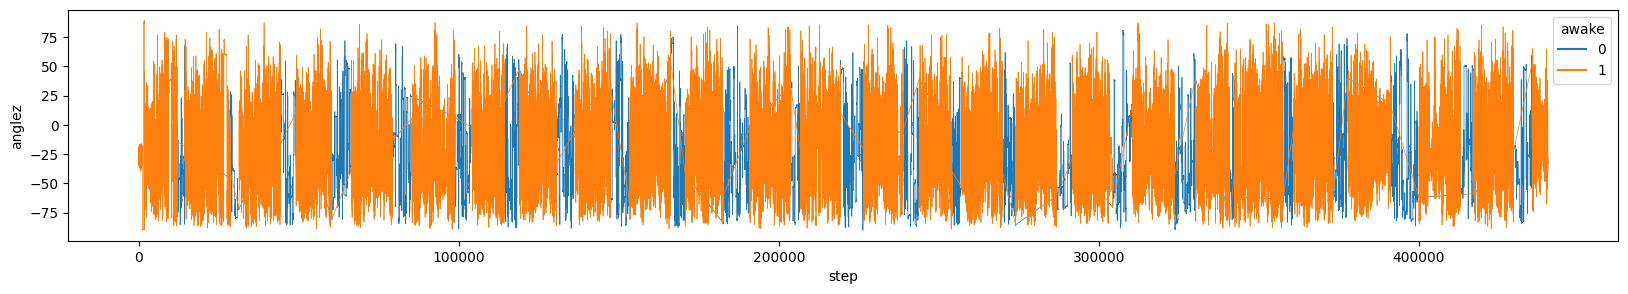

###  enmo for series 08db4255286f

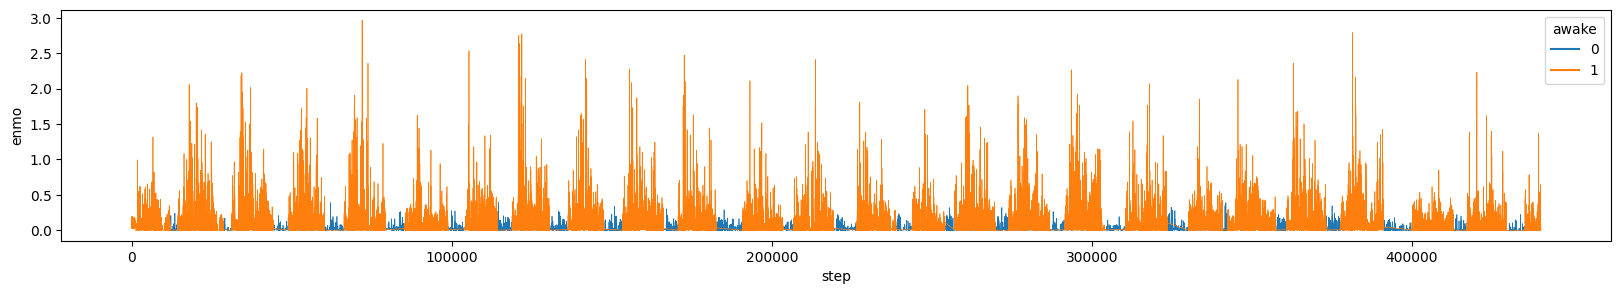

###  anglez for series 0a96f4993bd7

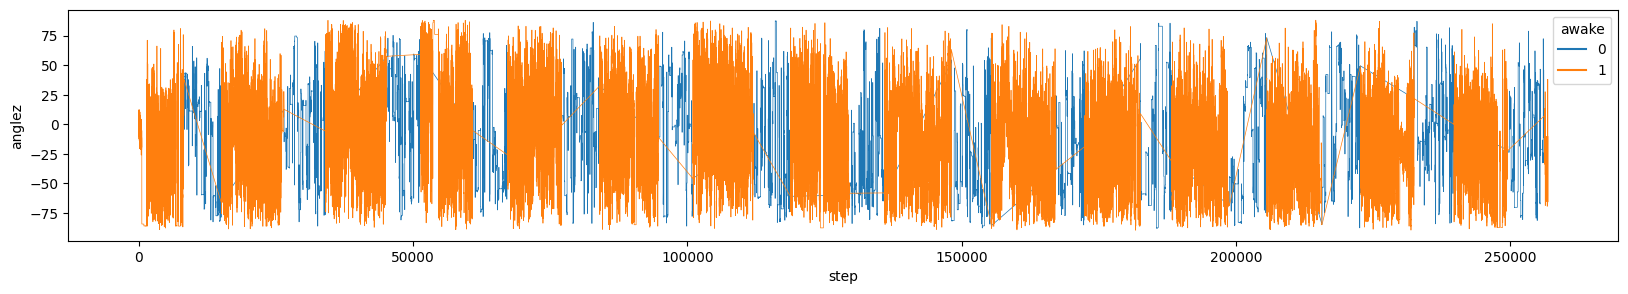

###  enmo for series 0a96f4993bd7

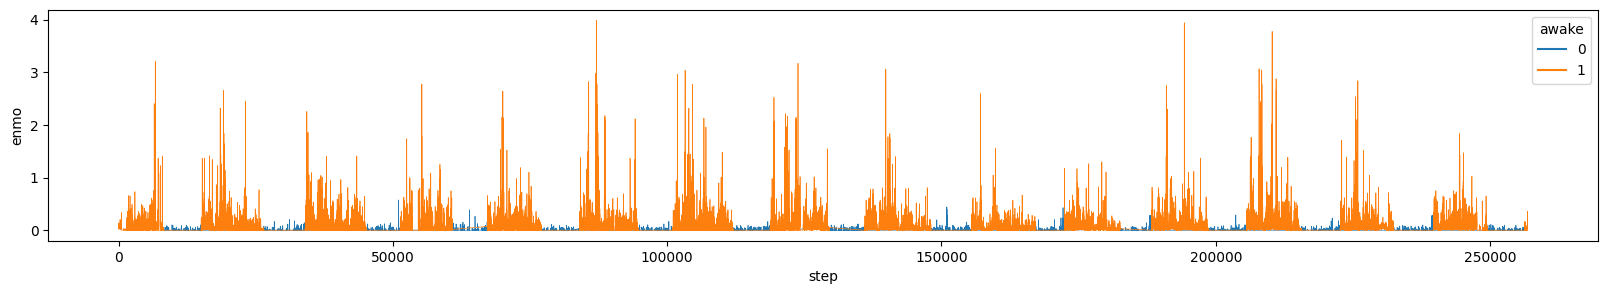

###  anglez for series 0cfc06c129cc

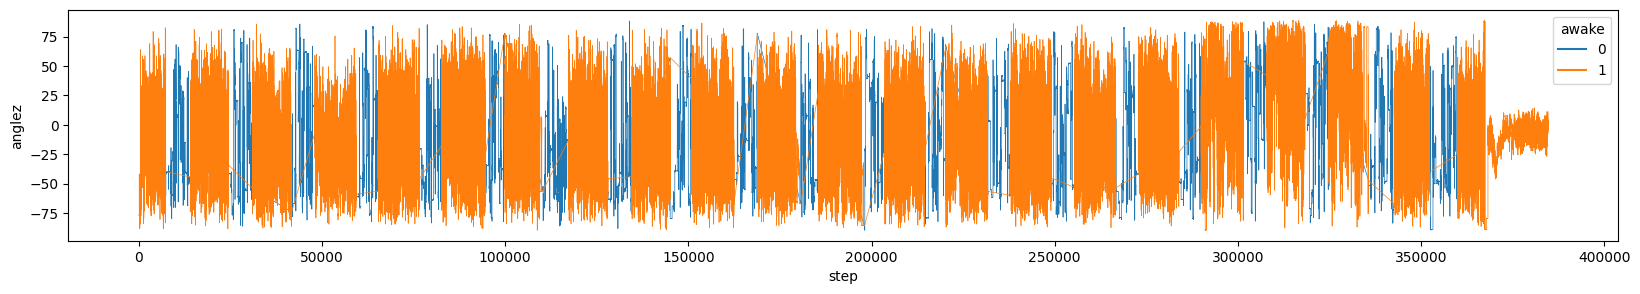

###  enmo for series 0cfc06c129cc

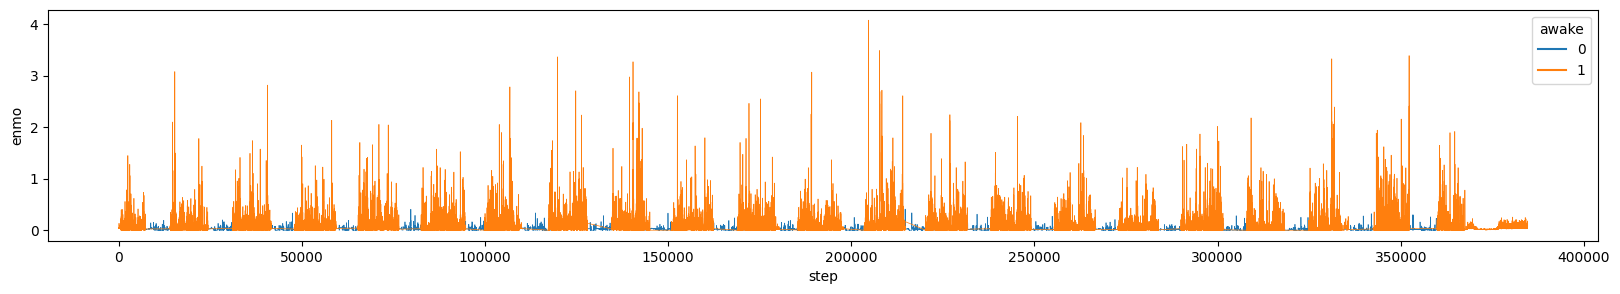

###  anglez for series 1087d7b0ff2e

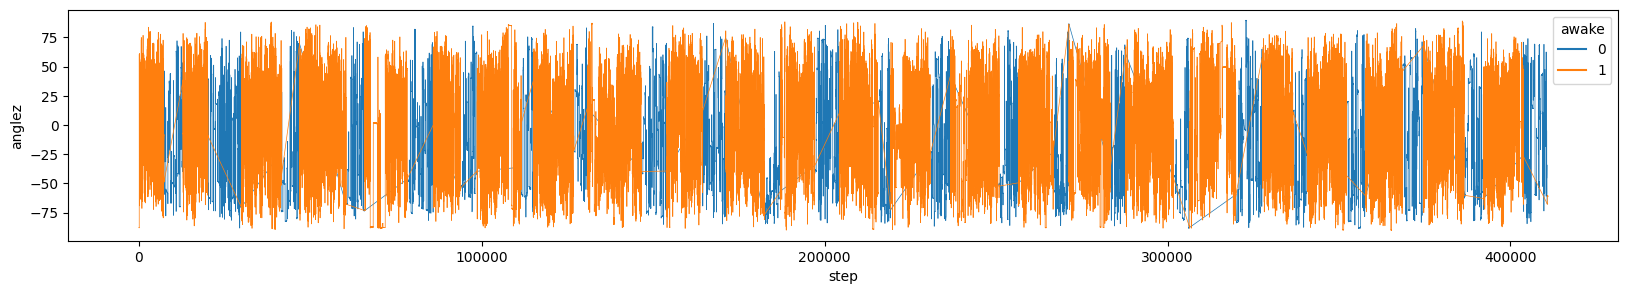

###  enmo for series 1087d7b0ff2e

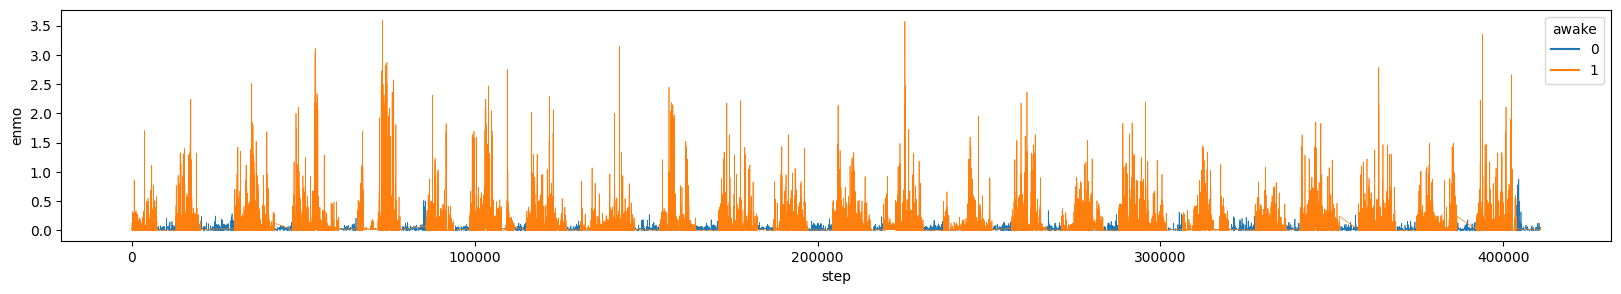

###  anglez for series 10f8bc1f7b07

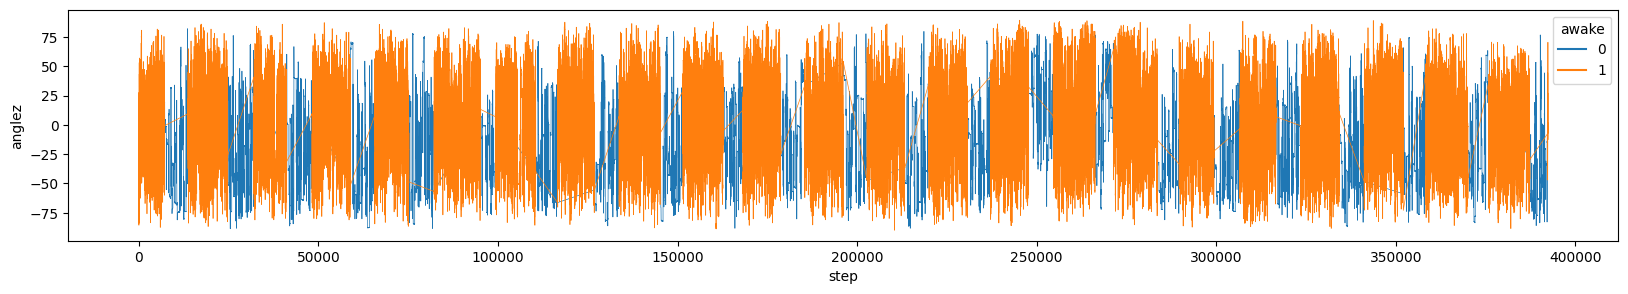

###  enmo for series 10f8bc1f7b07

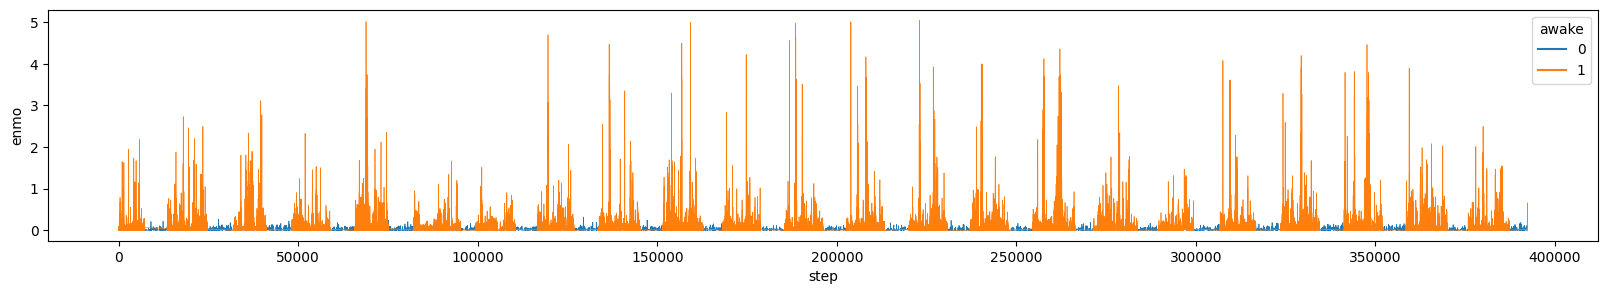

###  anglez for series 18b61dd5aae8

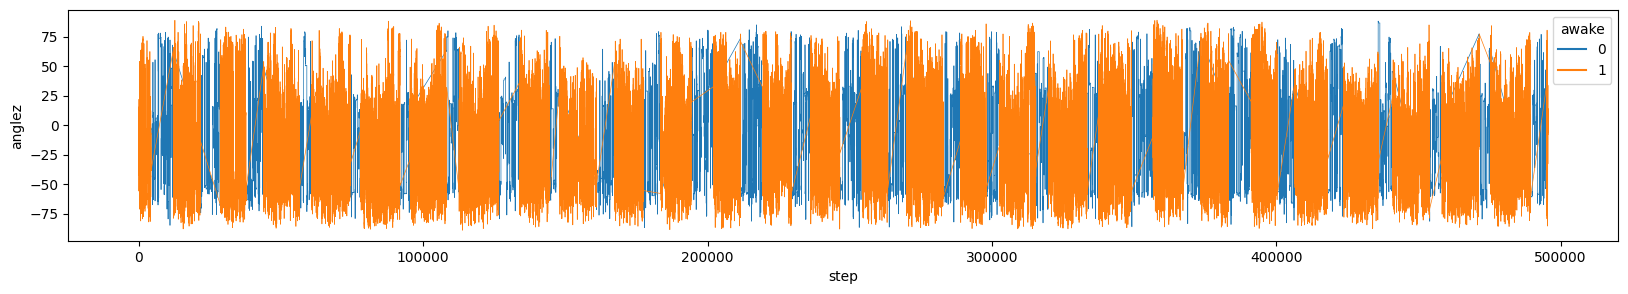

###  enmo for series 18b61dd5aae8

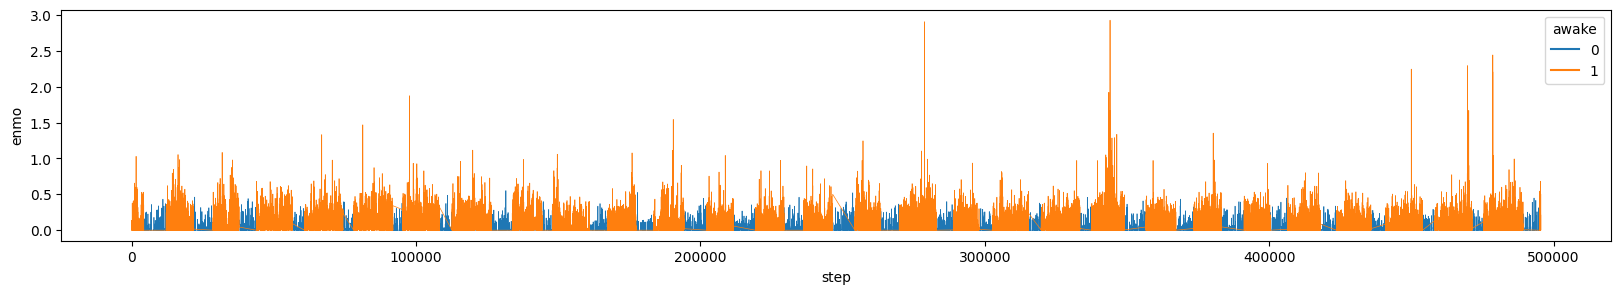

###  anglez for series 29c75c018220

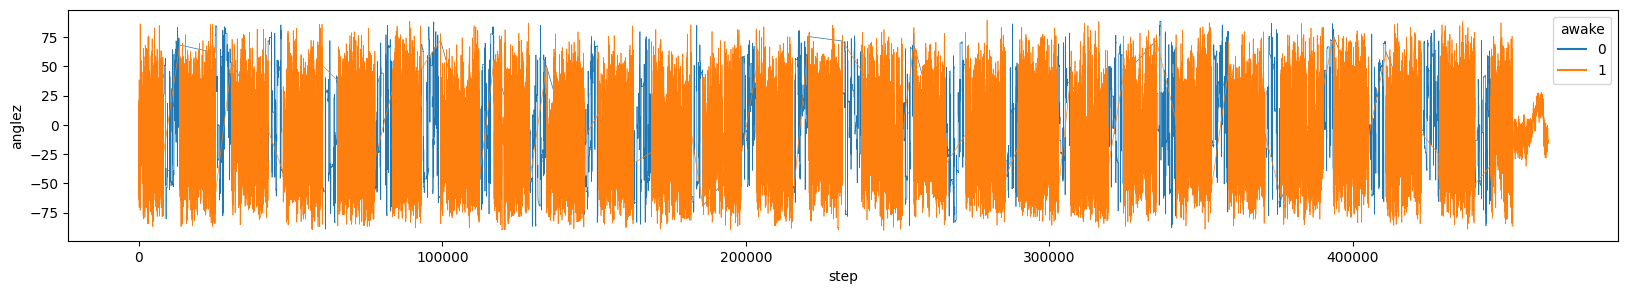

###  enmo for series 29c75c018220

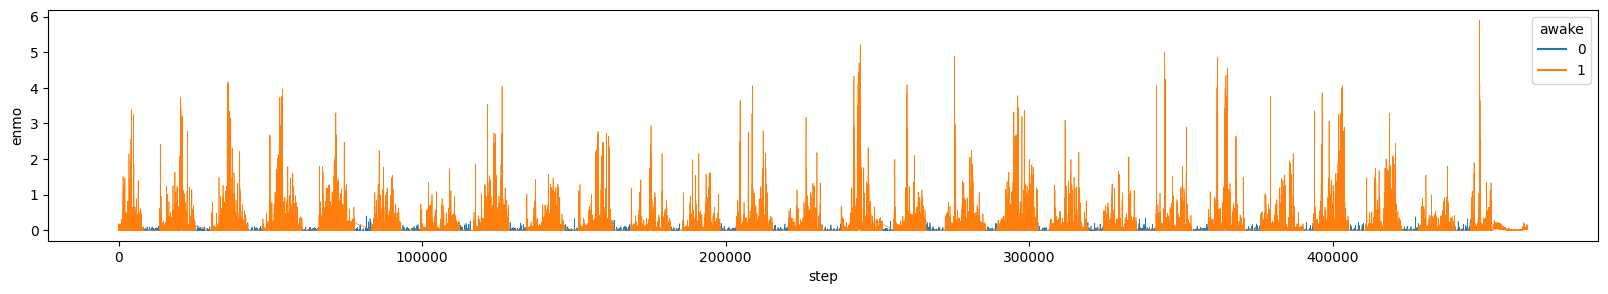

###  anglez for series 3452b878e596

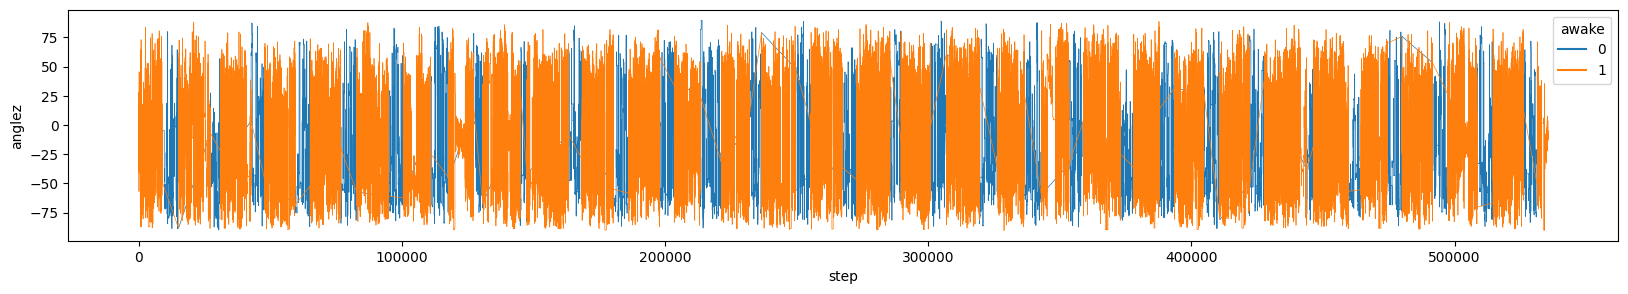

###  enmo for series 3452b878e596

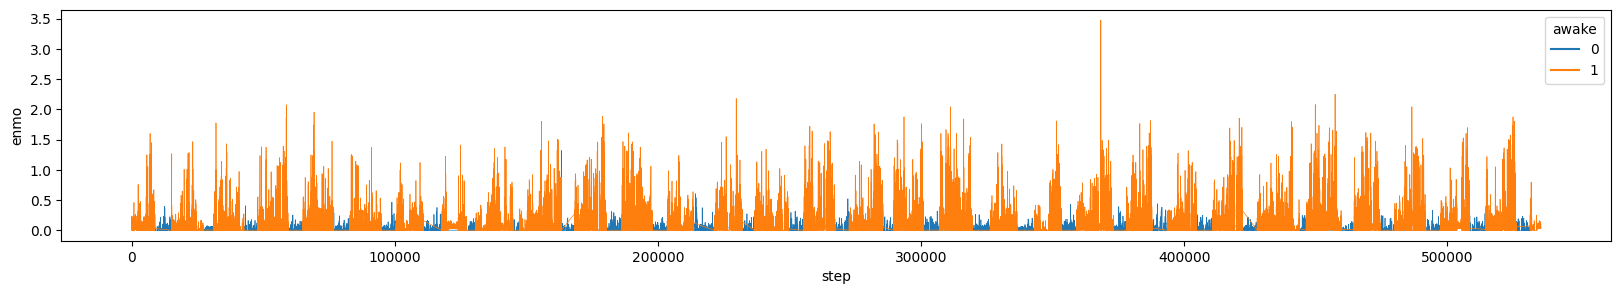

###  anglez for series 349c5562ee2c

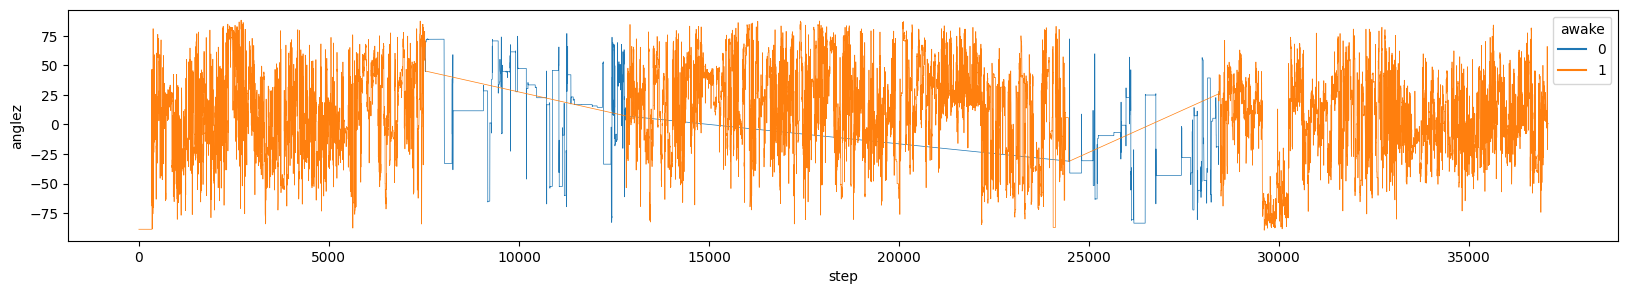

###  enmo for series 349c5562ee2c

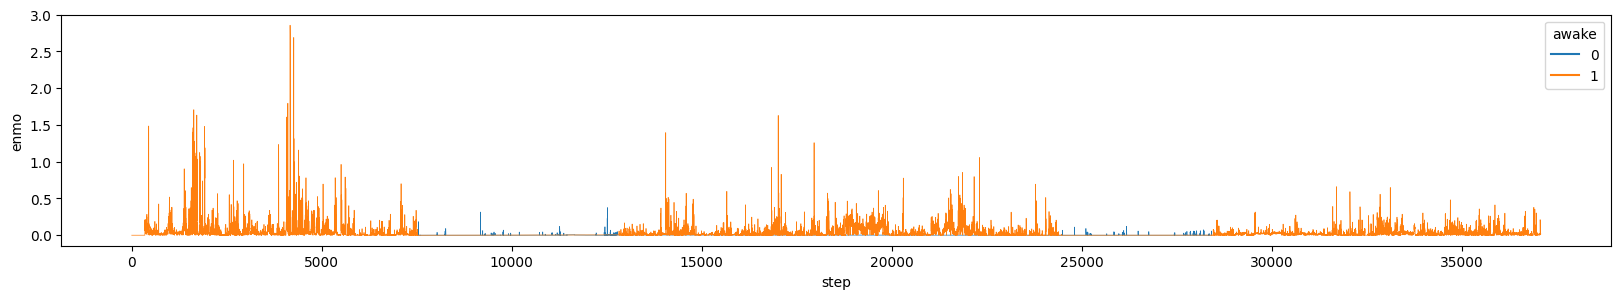

###  anglez for series 3664fe9233f9

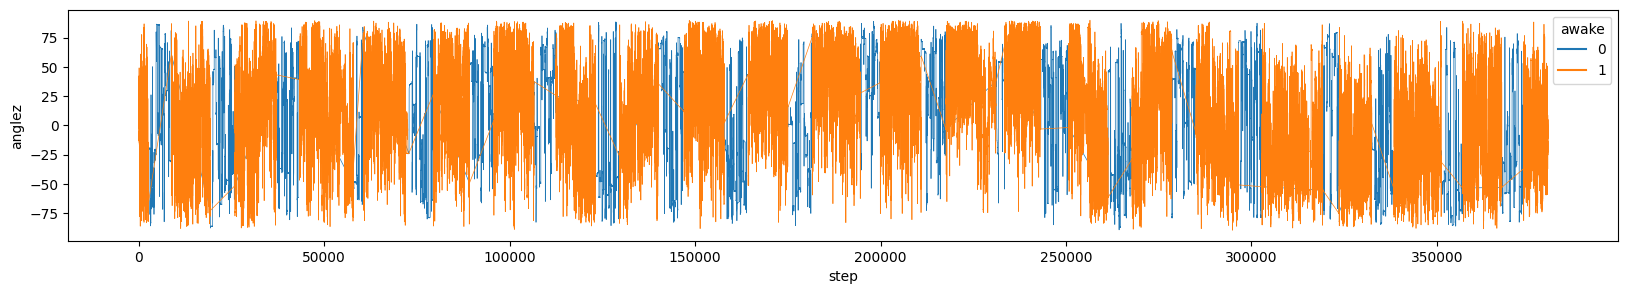

###  enmo for series 3664fe9233f9

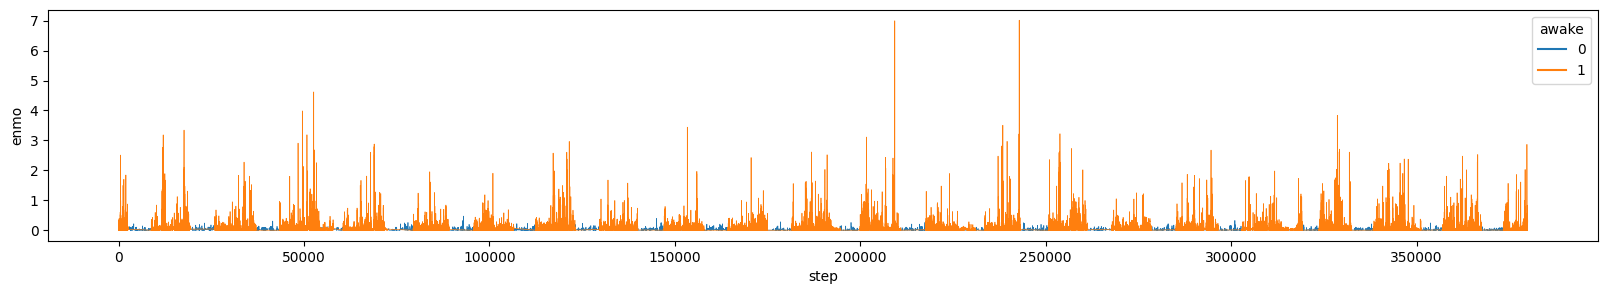

###  anglez for series 483d6545417f

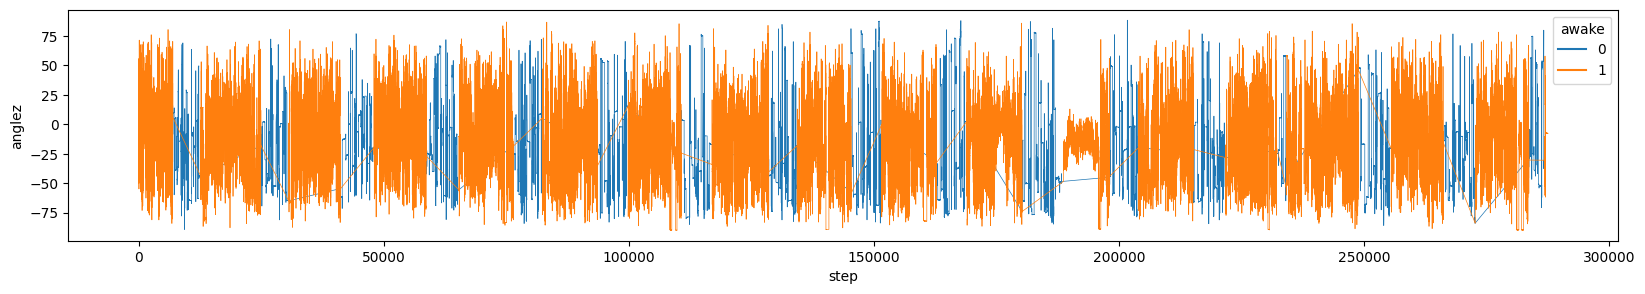

###  enmo for series 483d6545417f

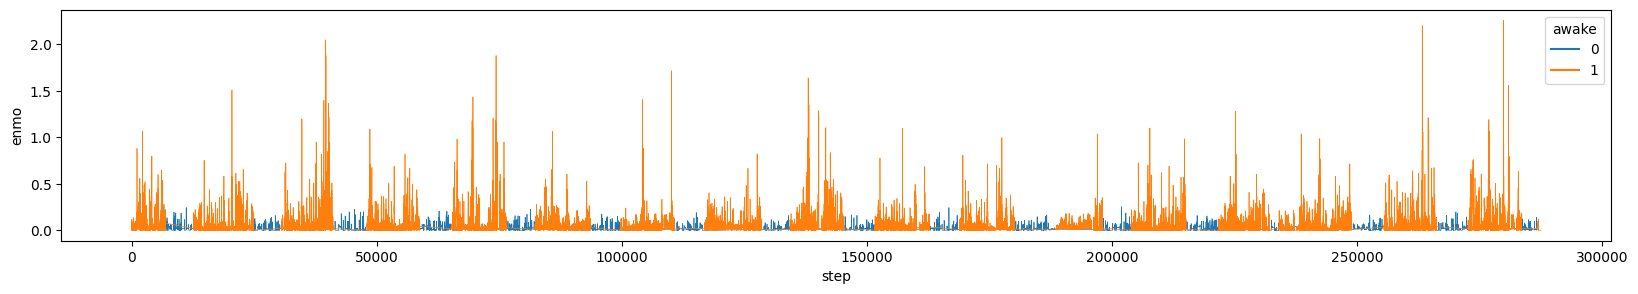

###  anglez for series 55a47ff9dc8a

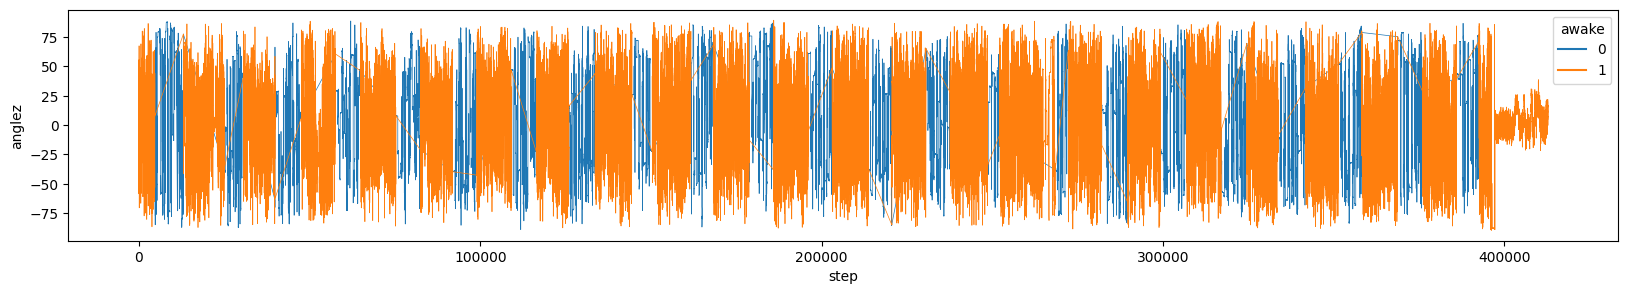

###  enmo for series 55a47ff9dc8a

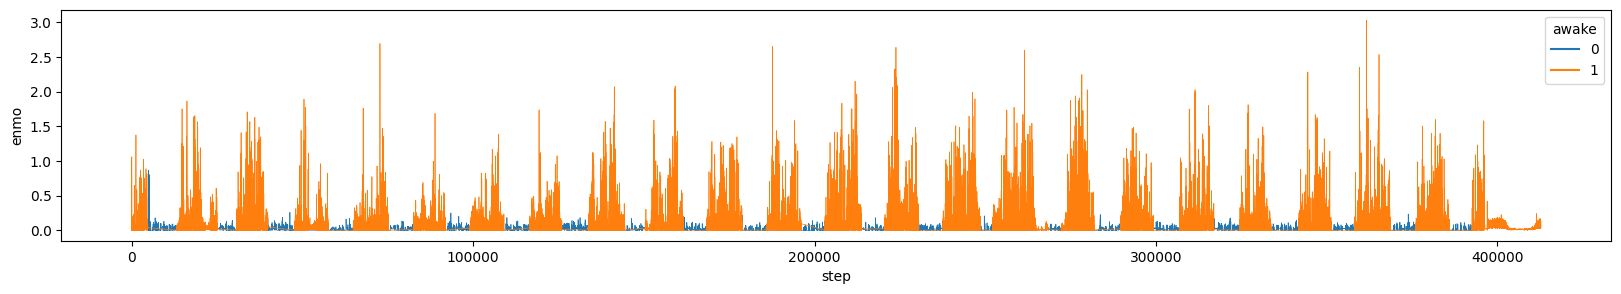

###  anglez for series 5acc9d63b5fd

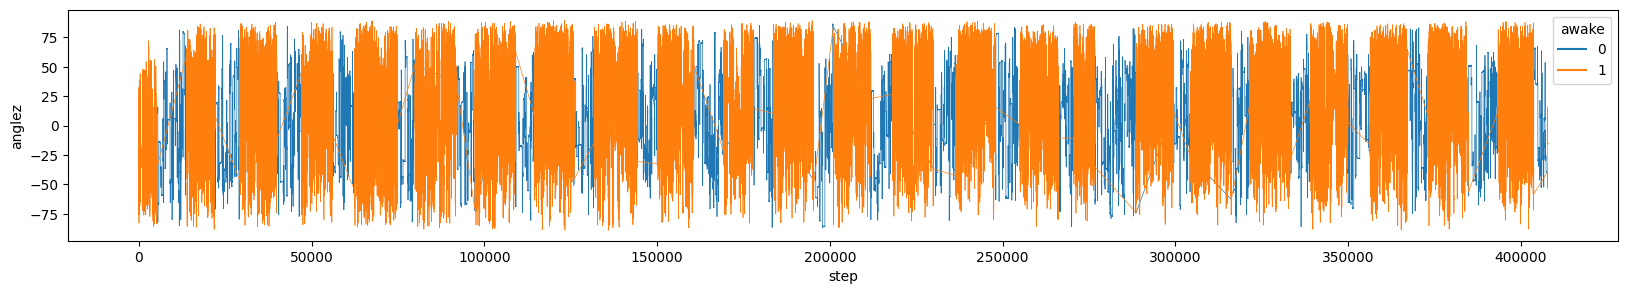

###  enmo for series 5acc9d63b5fd

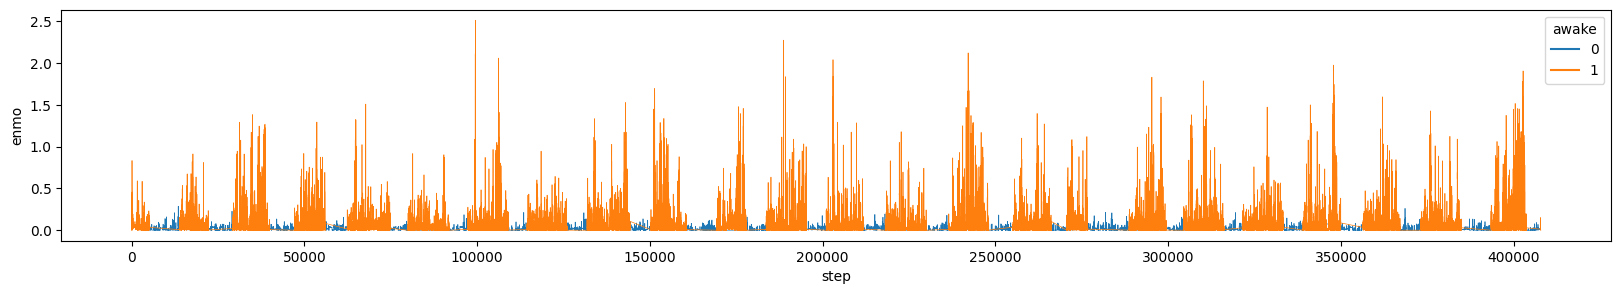

###  anglez for series 5f94bb3e1bed

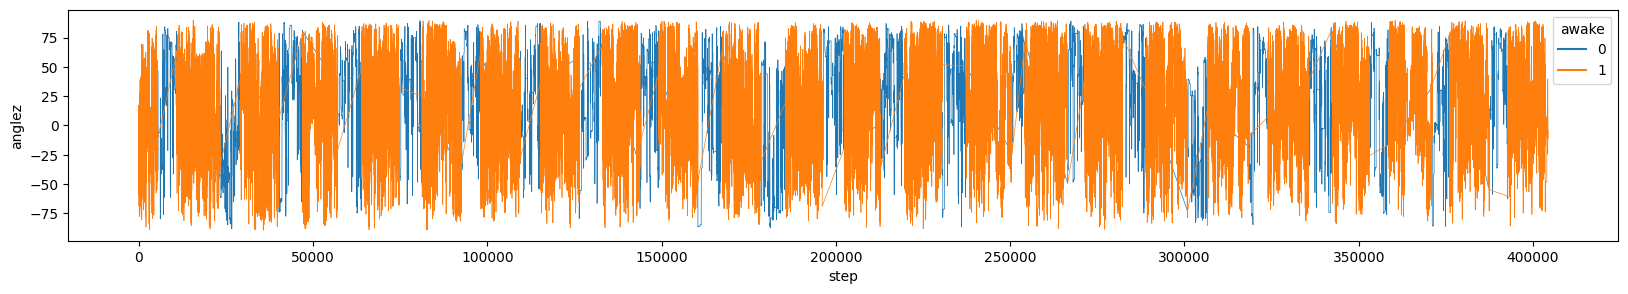

###  enmo for series 5f94bb3e1bed

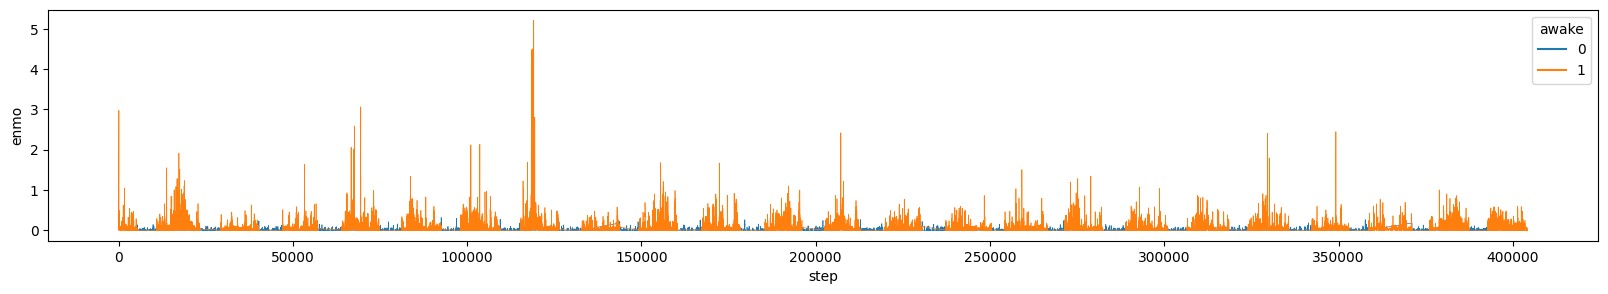

###  anglez for series 655f19eabf1e

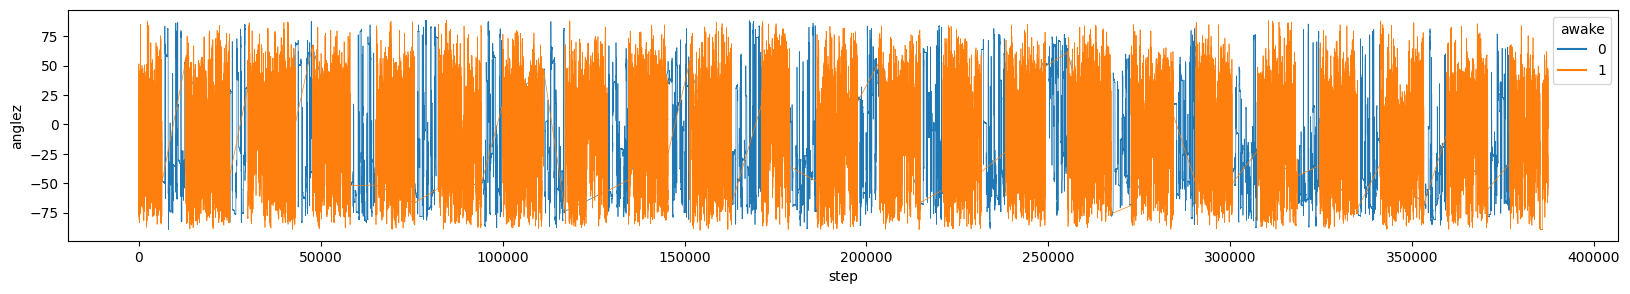

###  enmo for series 655f19eabf1e

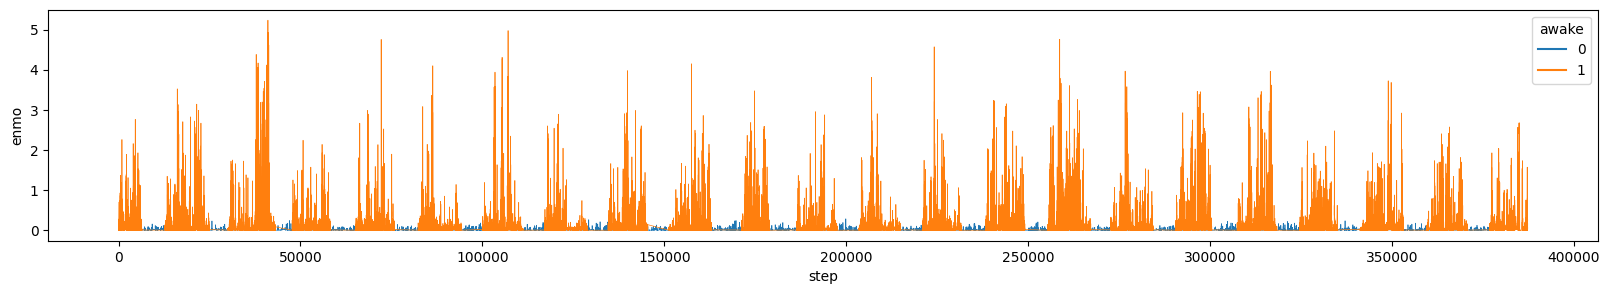

###  anglez for series 67f5fc60e494

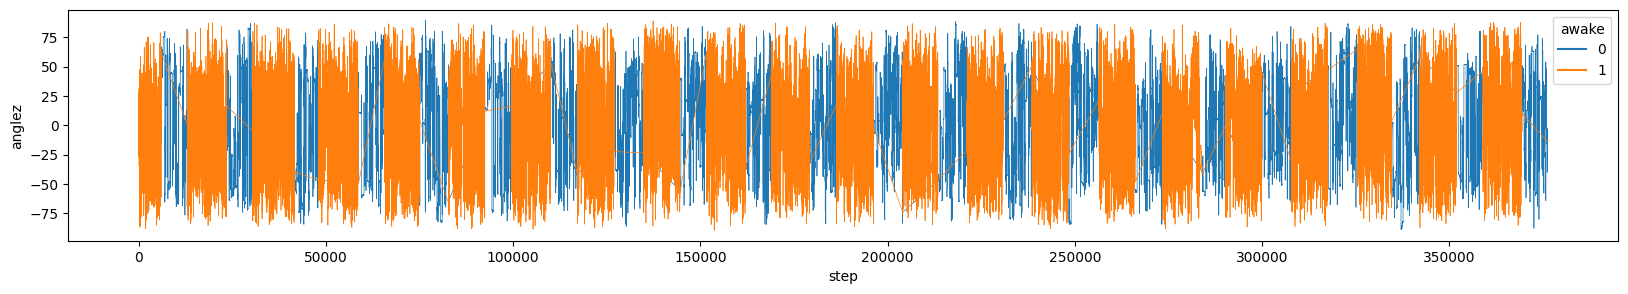

###  enmo for series 67f5fc60e494

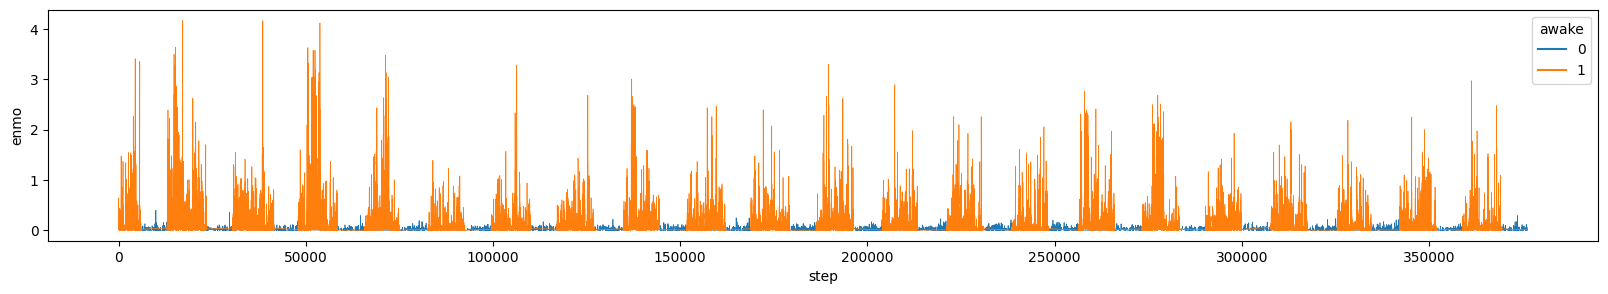

###  anglez for series 72bbd1ac3edf

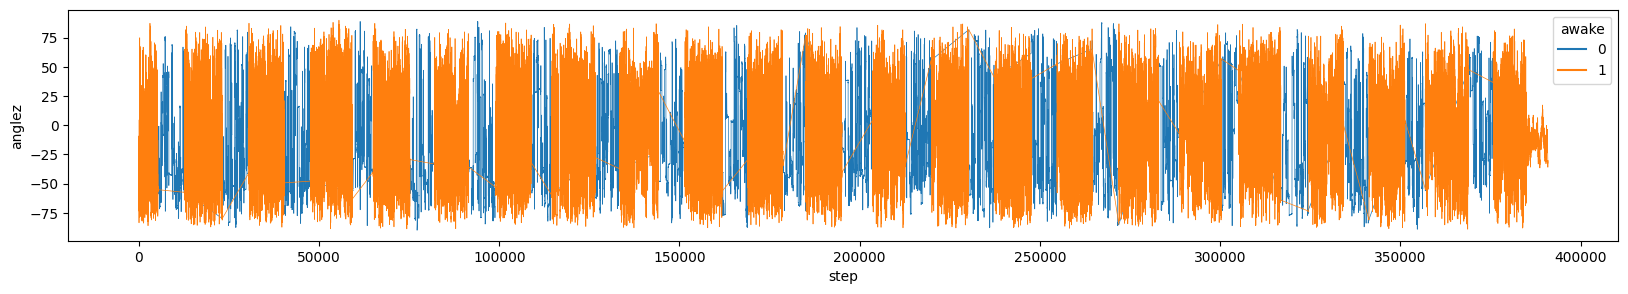

###  enmo for series 72bbd1ac3edf

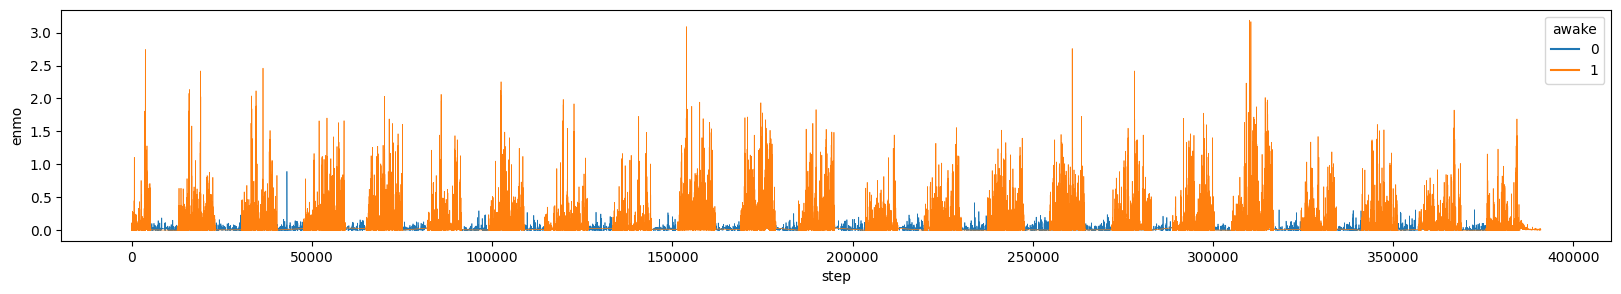

###  anglez for series 76237b9406d5

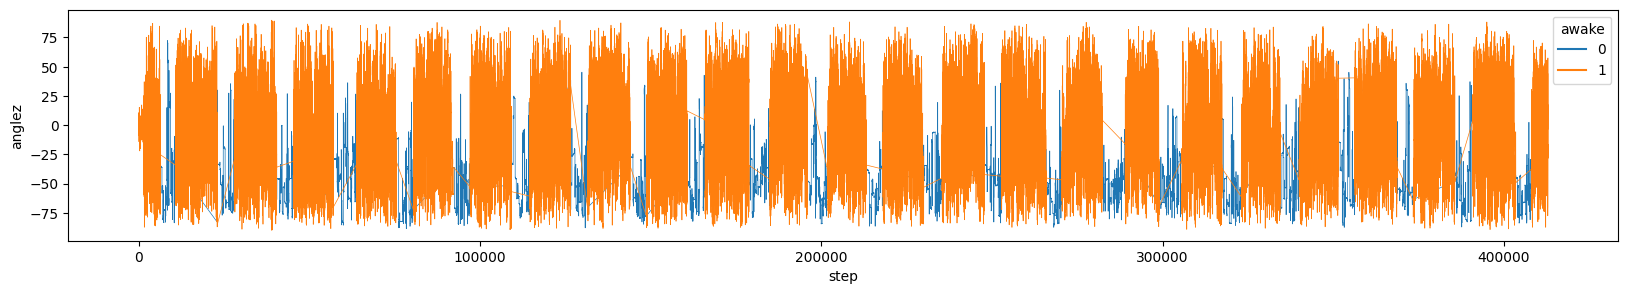

###  enmo for series 76237b9406d5

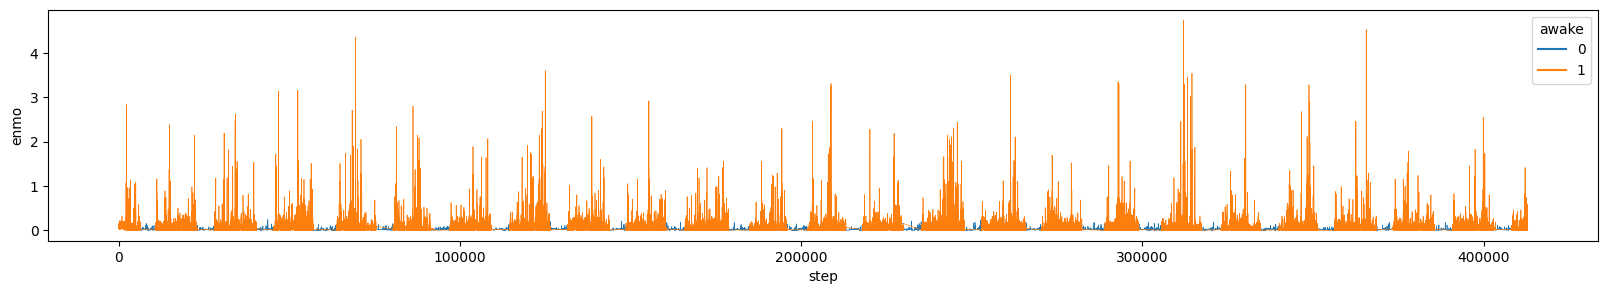

###  anglez for series 7822ee8fe3ec

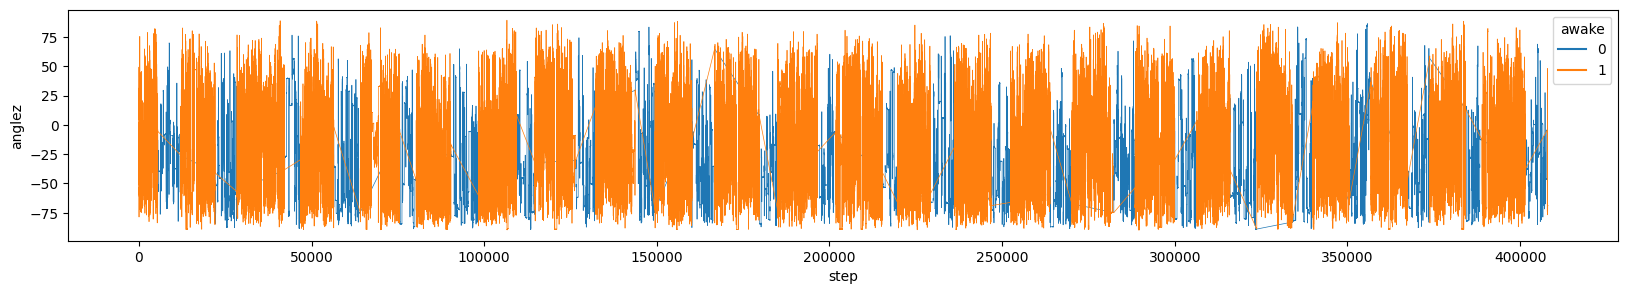

###  enmo for series 7822ee8fe3ec

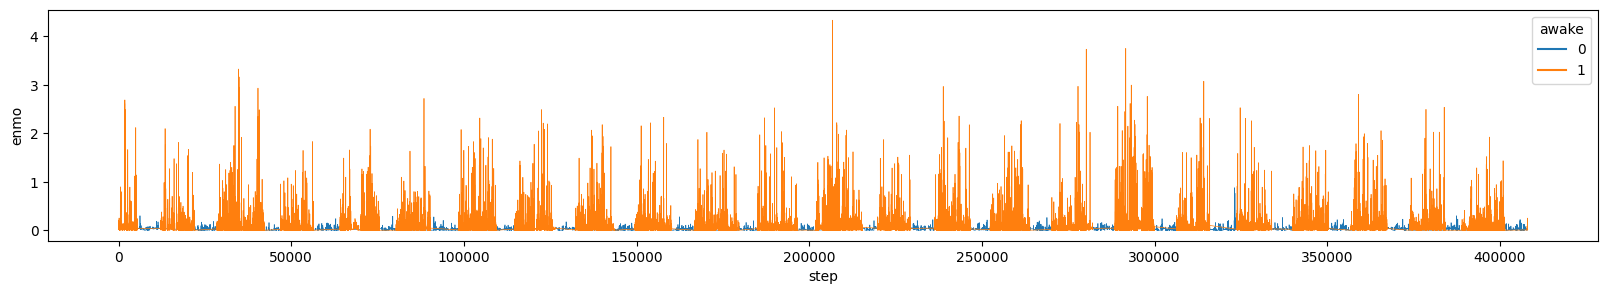

###  anglez for series 89bd631d1769

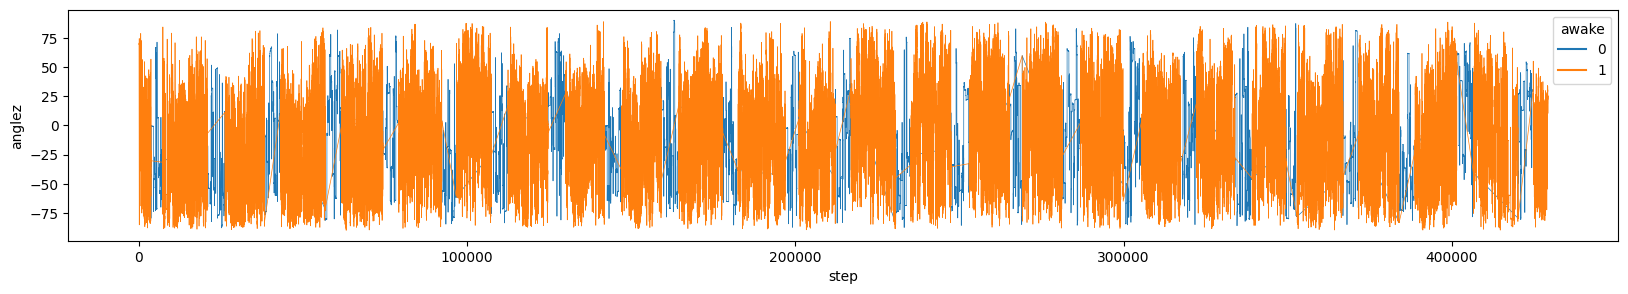

###  enmo for series 89bd631d1769

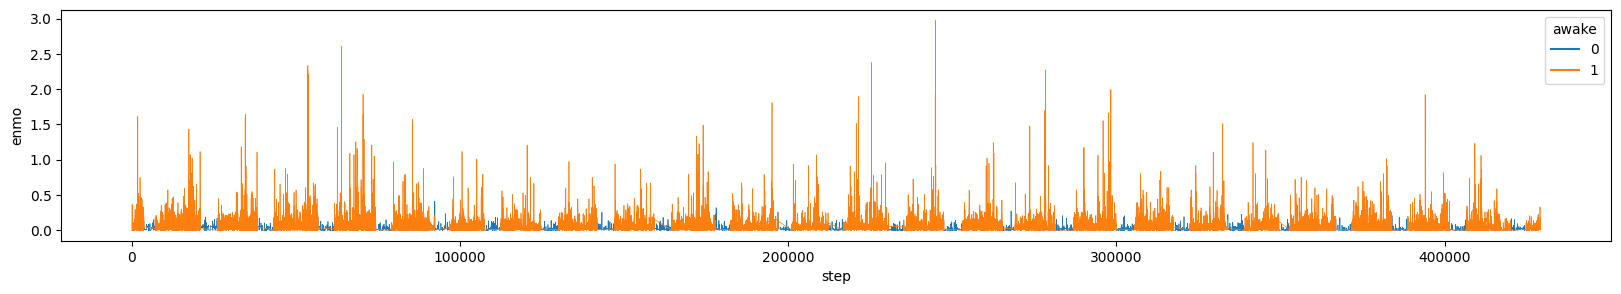

###  anglez for series 8e32047cbc1f

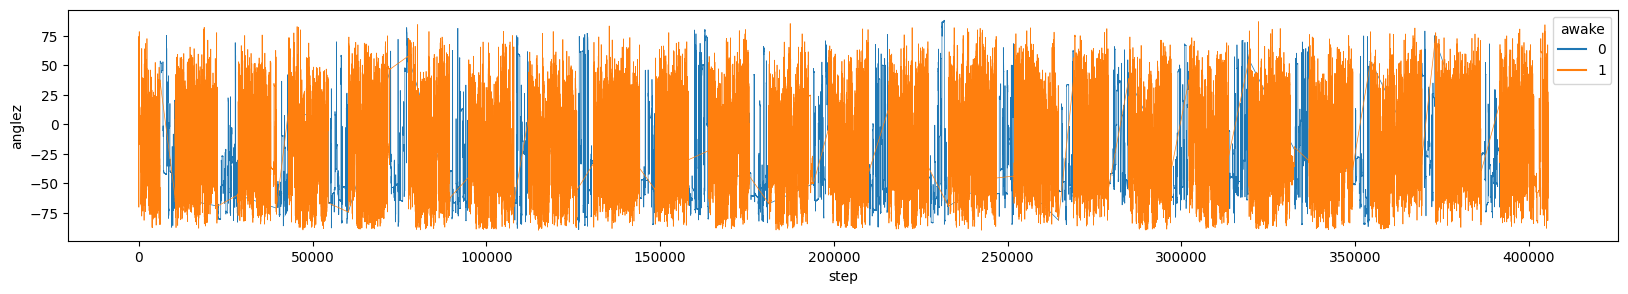

###  enmo for series 8e32047cbc1f

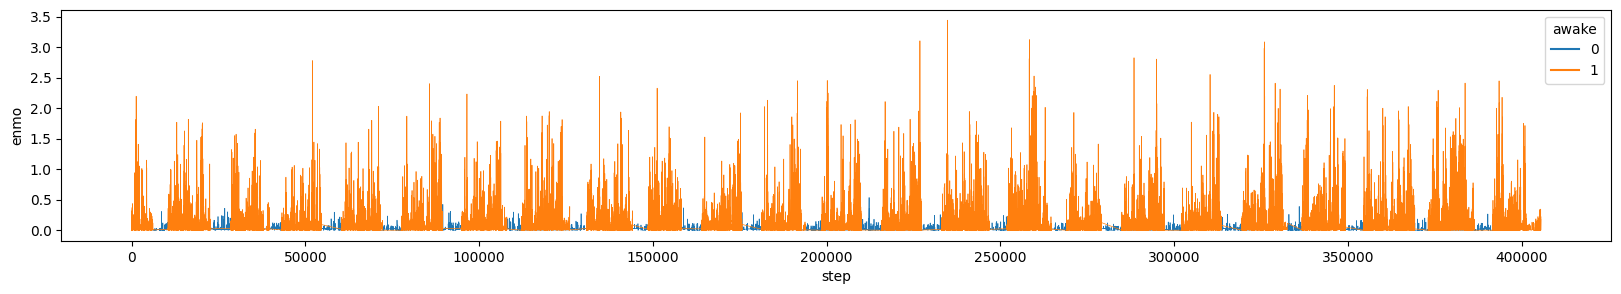

###  anglez for series 939932f1822d

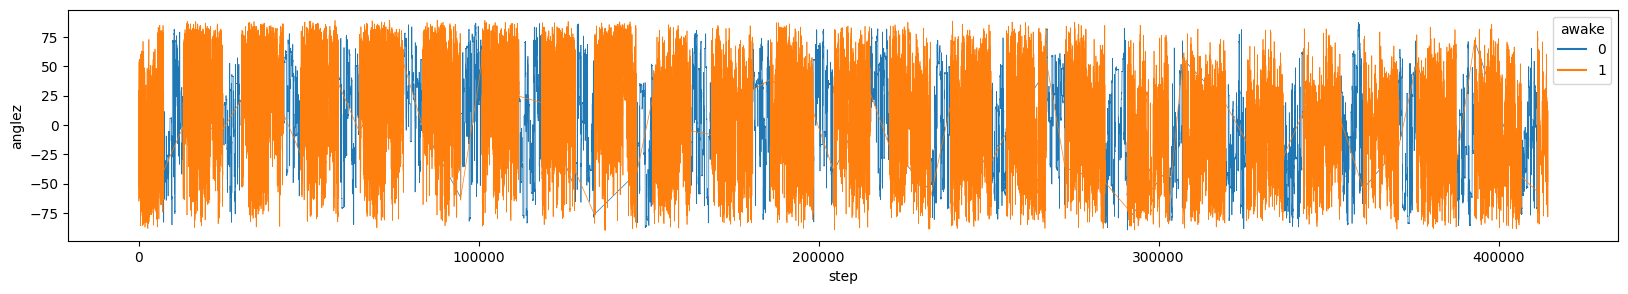

###  enmo for series 939932f1822d

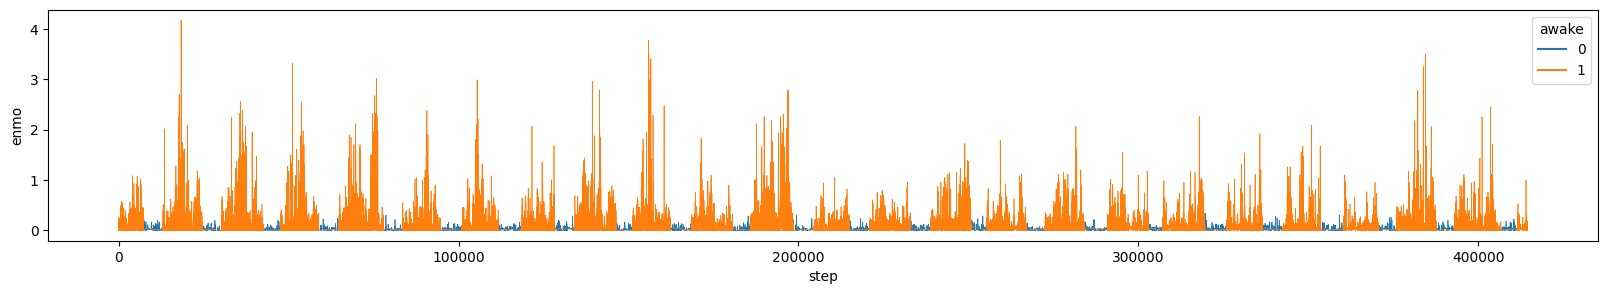

###  anglez for series 9ee455e4770d

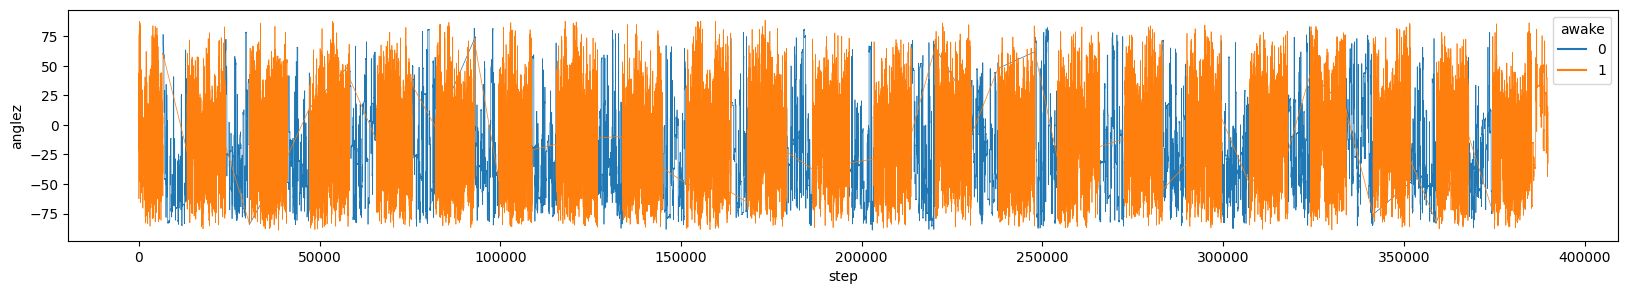

###  enmo for series 9ee455e4770d

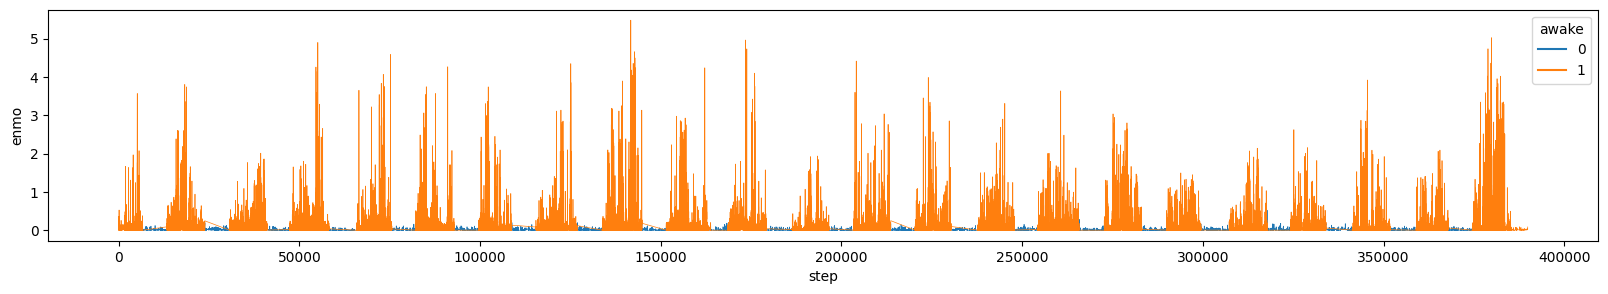

###  anglez for series a9a2f7fac455

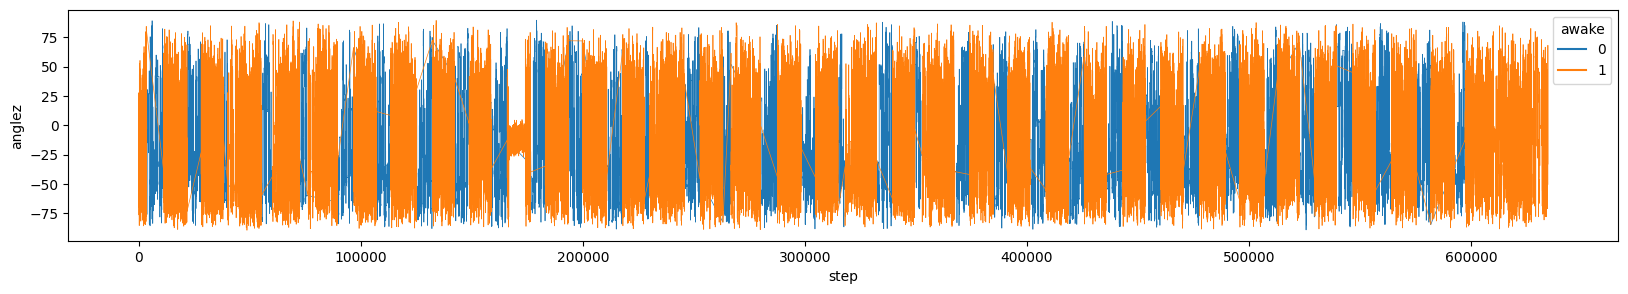

###  enmo for series a9a2f7fac455

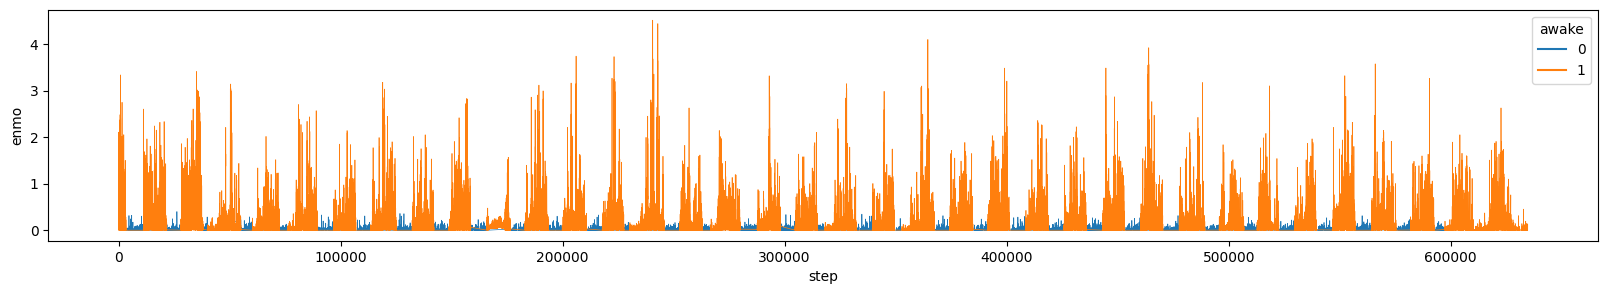

###  anglez for series a9e5f5314bcb

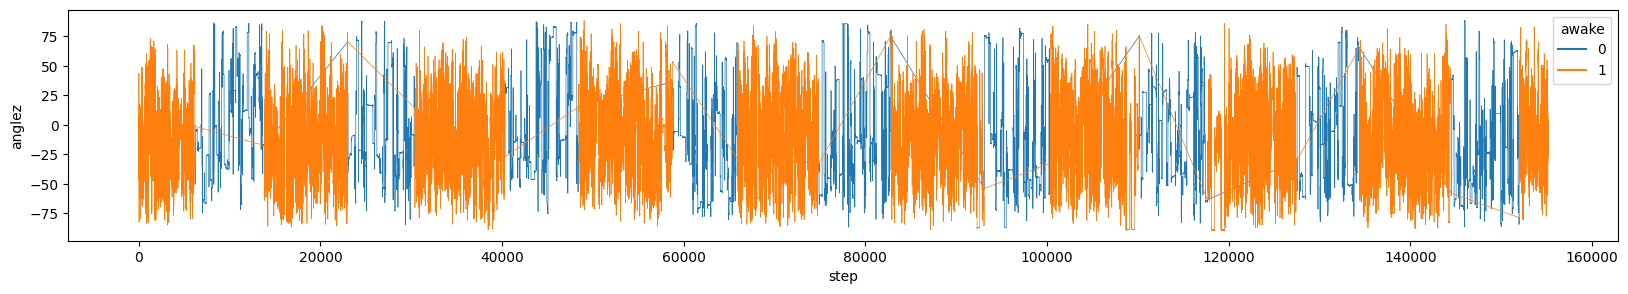

###  enmo for series a9e5f5314bcb

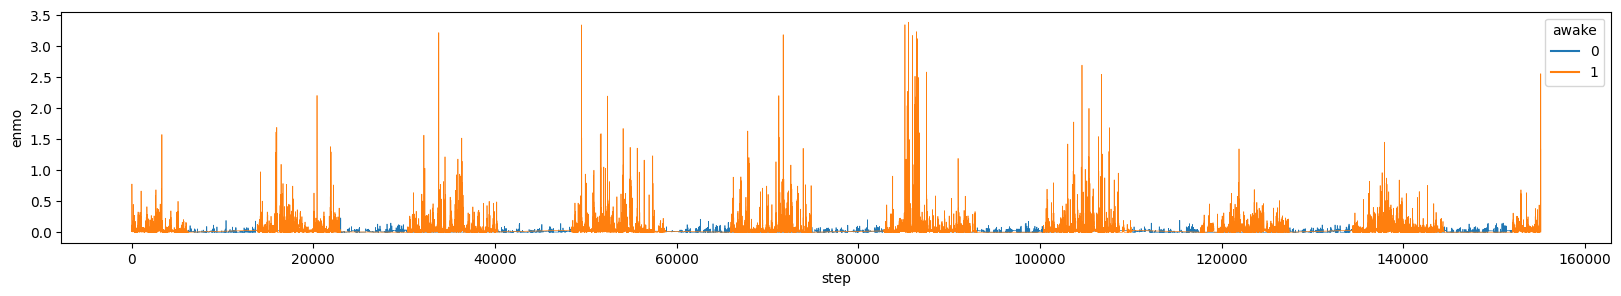

###  anglez for series af91d9a50547

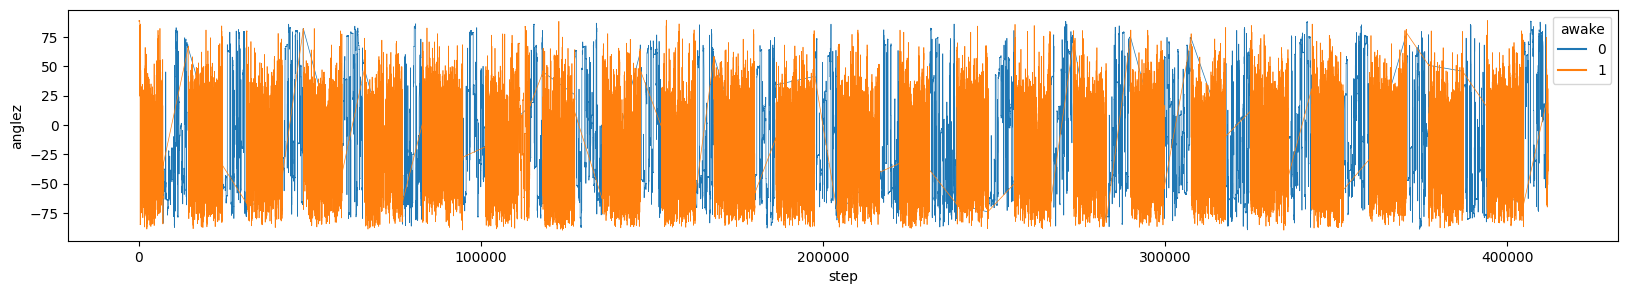

###  enmo for series af91d9a50547

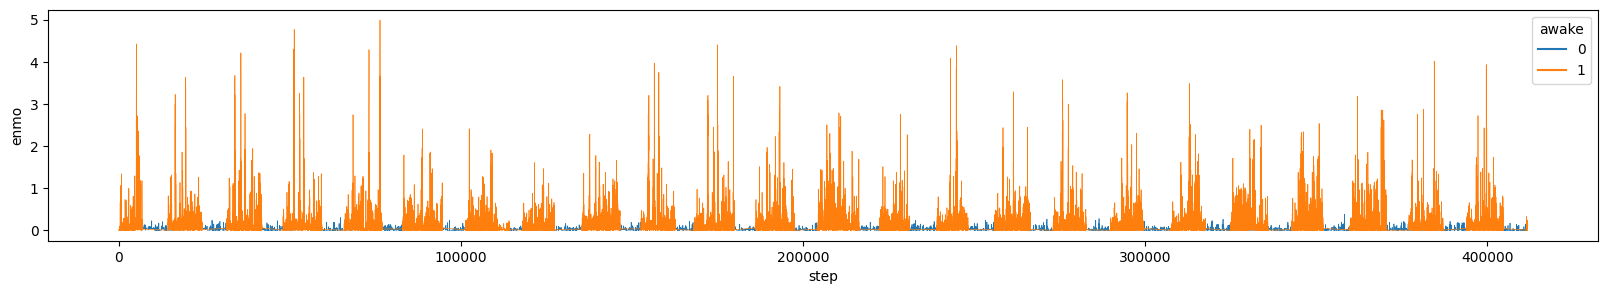

###  anglez for series b364205aba43

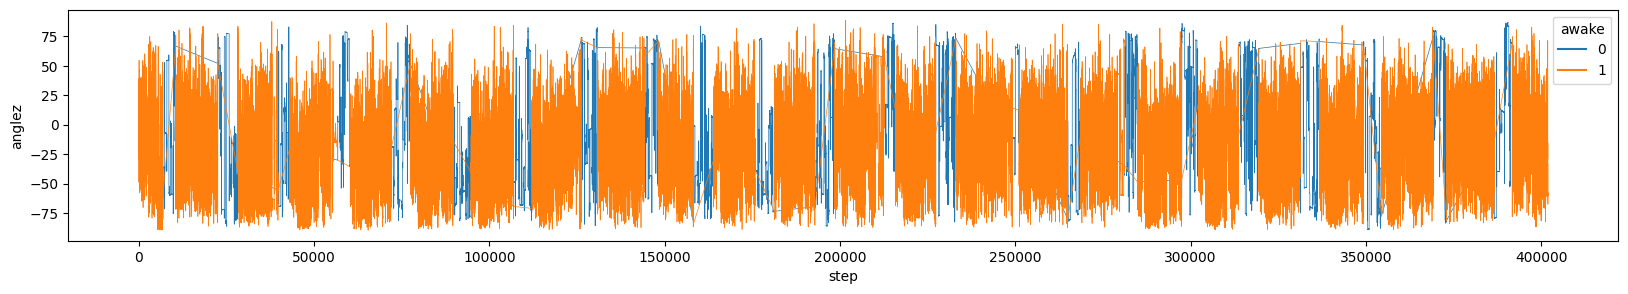

###  enmo for series b364205aba43

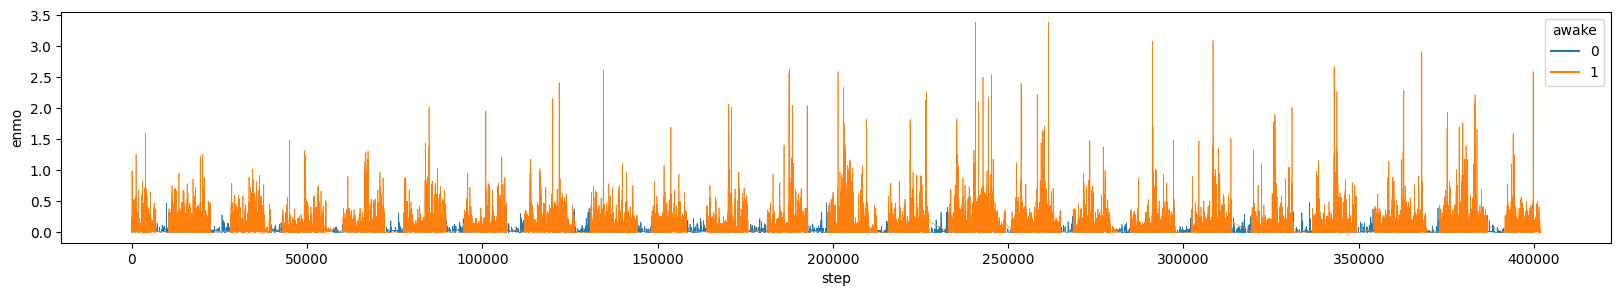

###  anglez for series c535634d7dcd

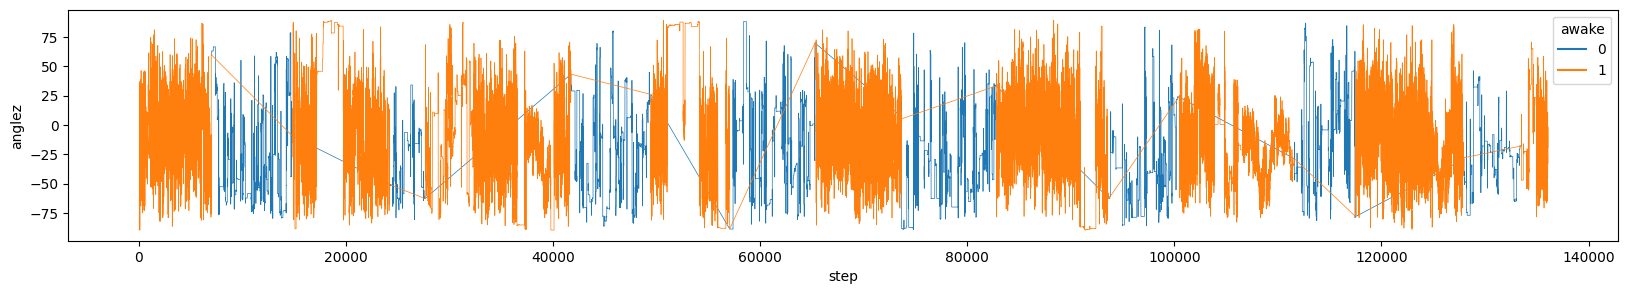

###  enmo for series c535634d7dcd

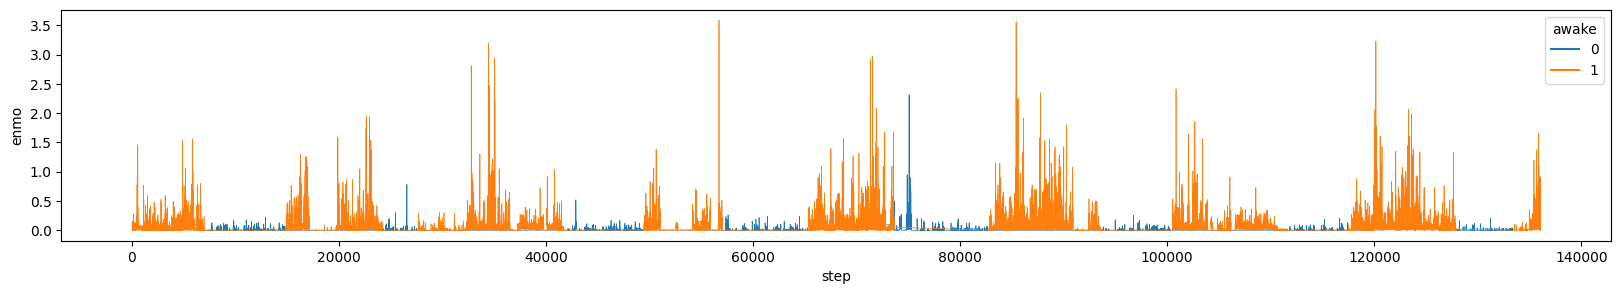

###  anglez for series c6788e579967

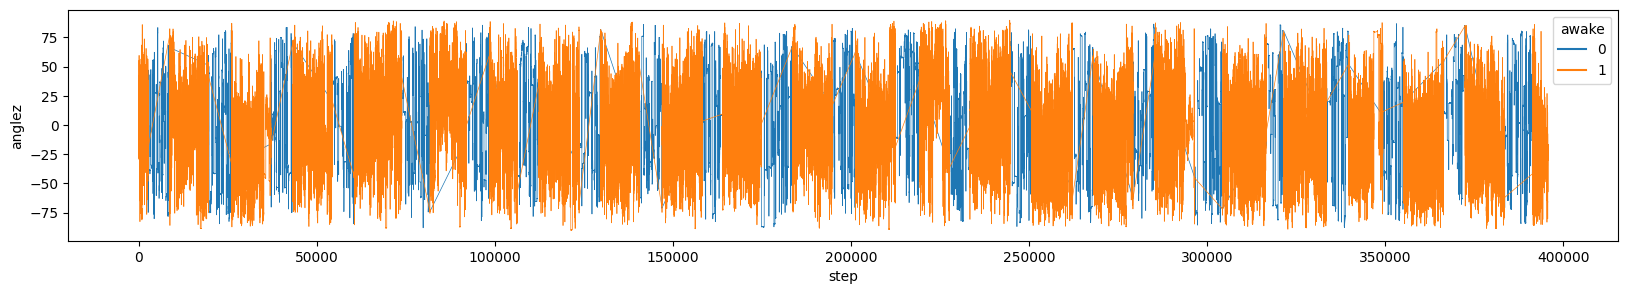

###  enmo for series c6788e579967

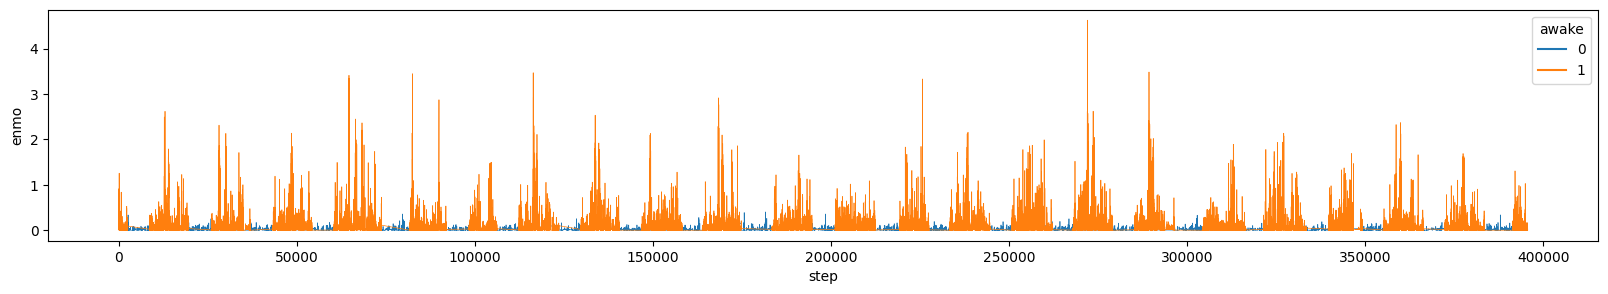

###  anglez for series c68260cc9e8f

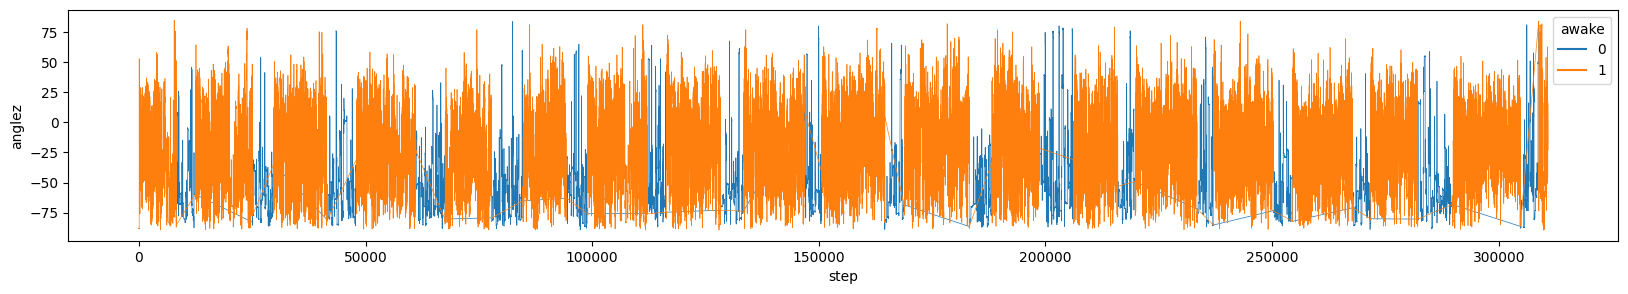

###  enmo for series c68260cc9e8f

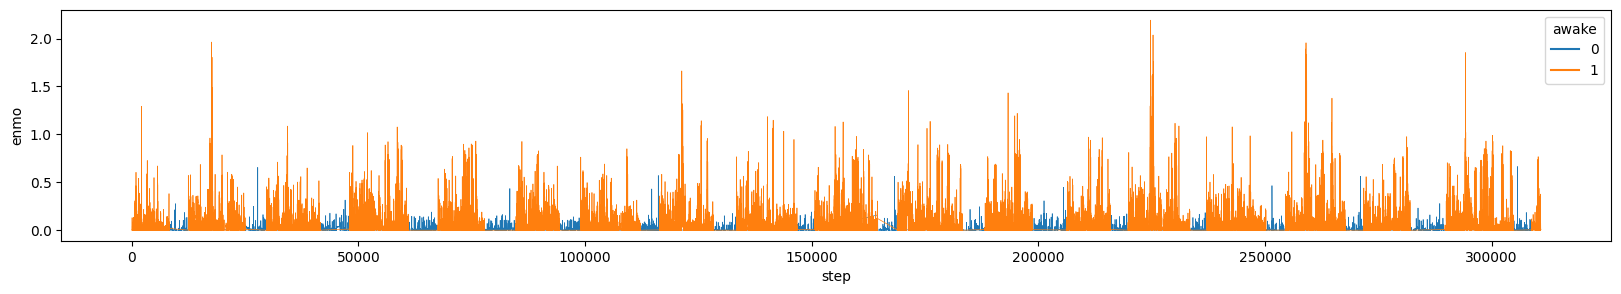

###  anglez for series ca730dbf521d

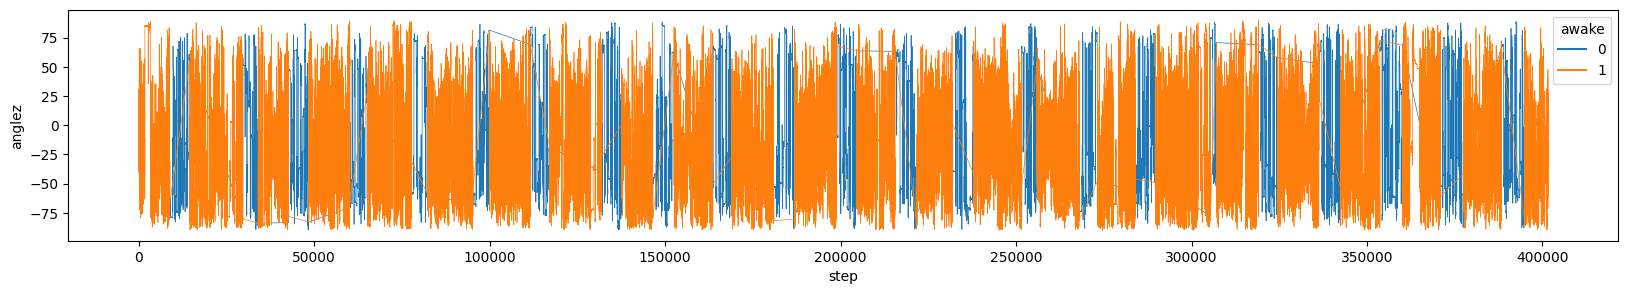

###  enmo for series ca730dbf521d

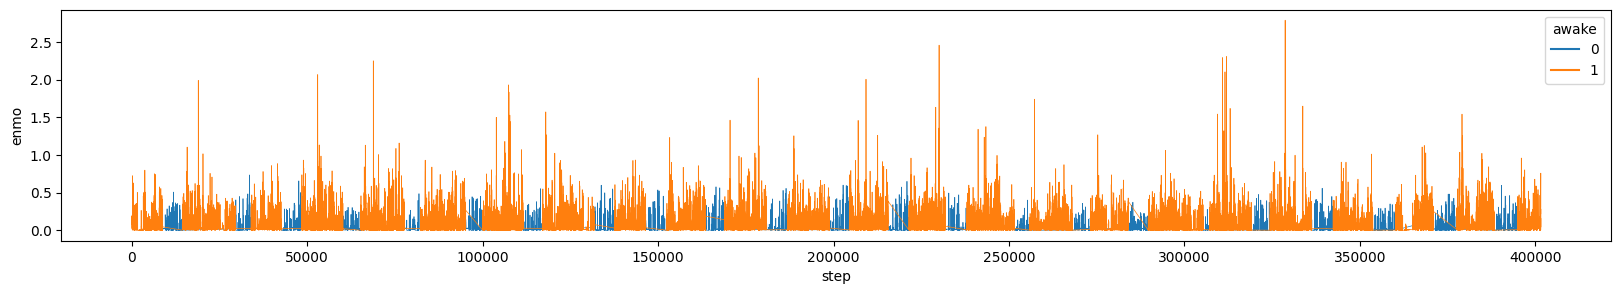

###  anglez for series d150801f3145

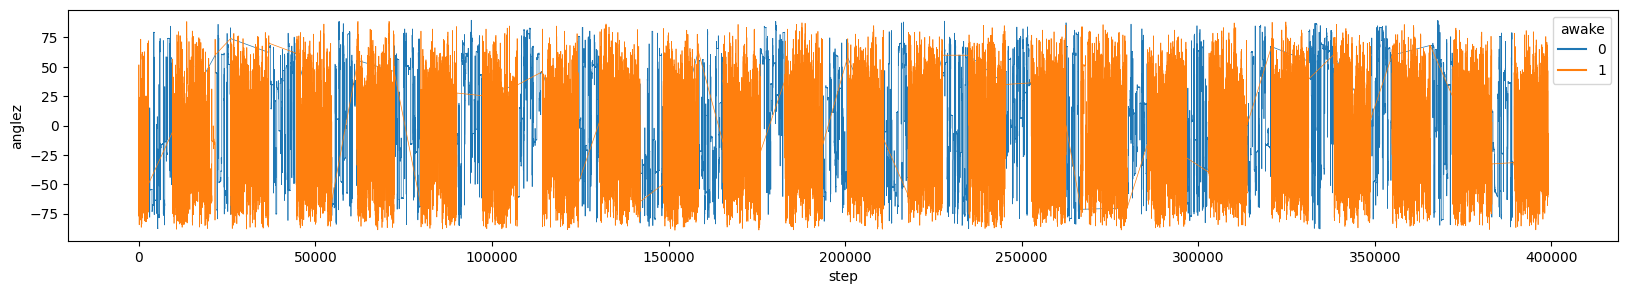

###  enmo for series d150801f3145

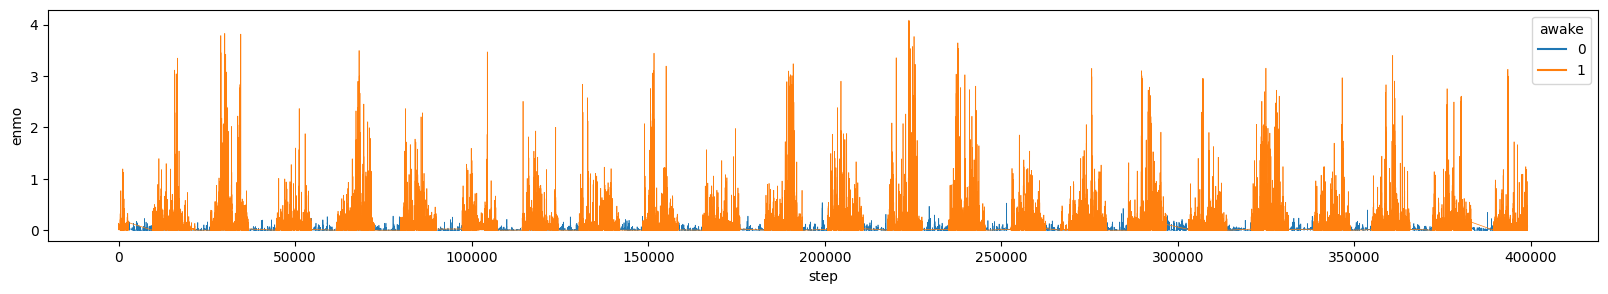

###  anglez for series d25e479ecbb7

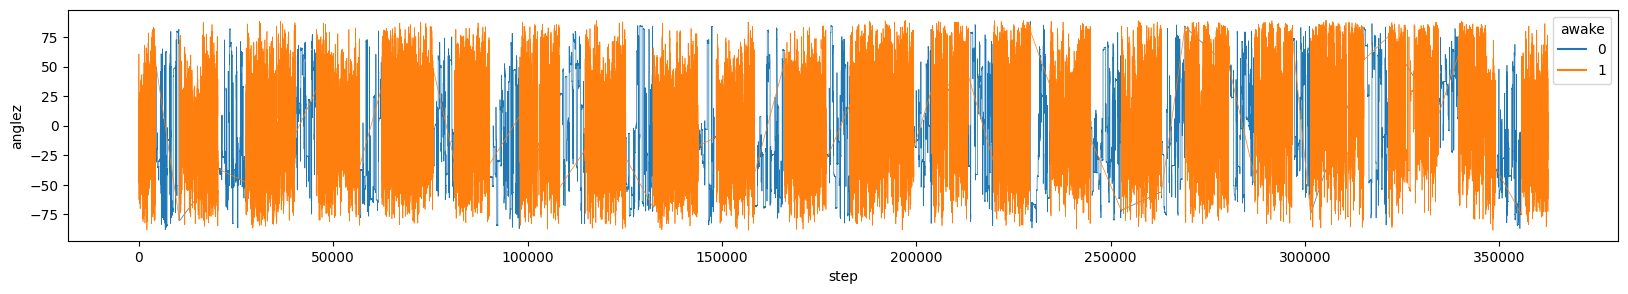

###  enmo for series d25e479ecbb7

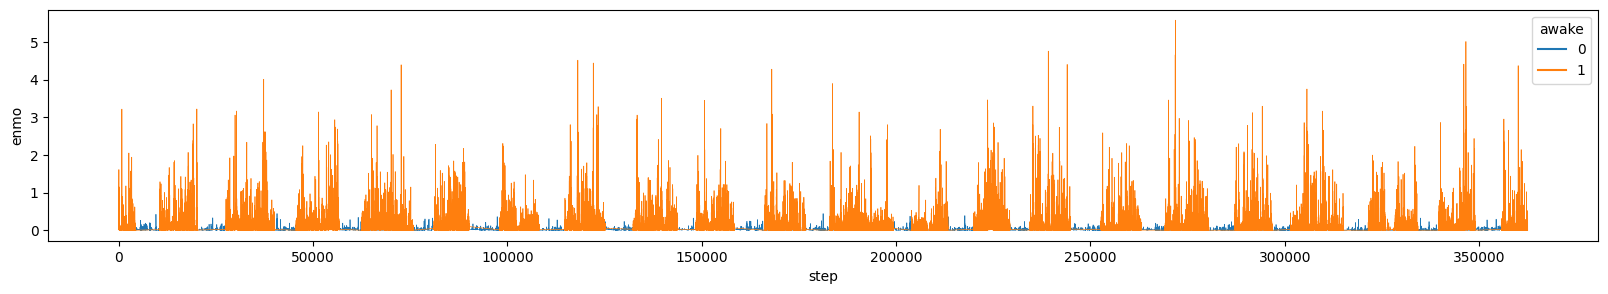

###  anglez for series d515236bdeec

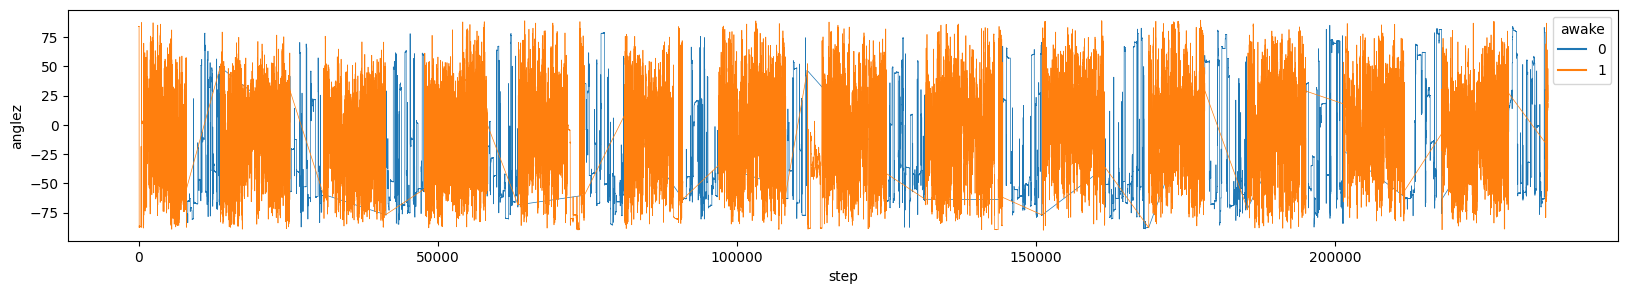

###  enmo for series d515236bdeec

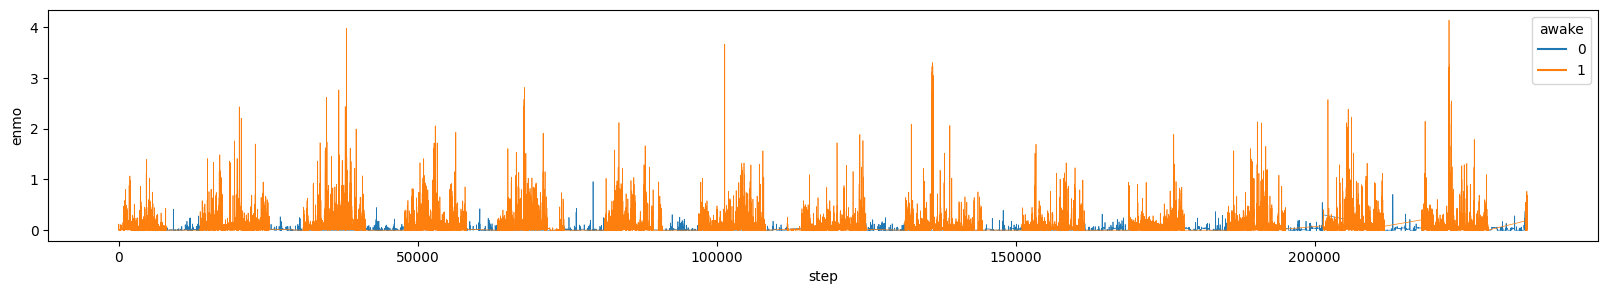

###  anglez for series d5e47b94477e

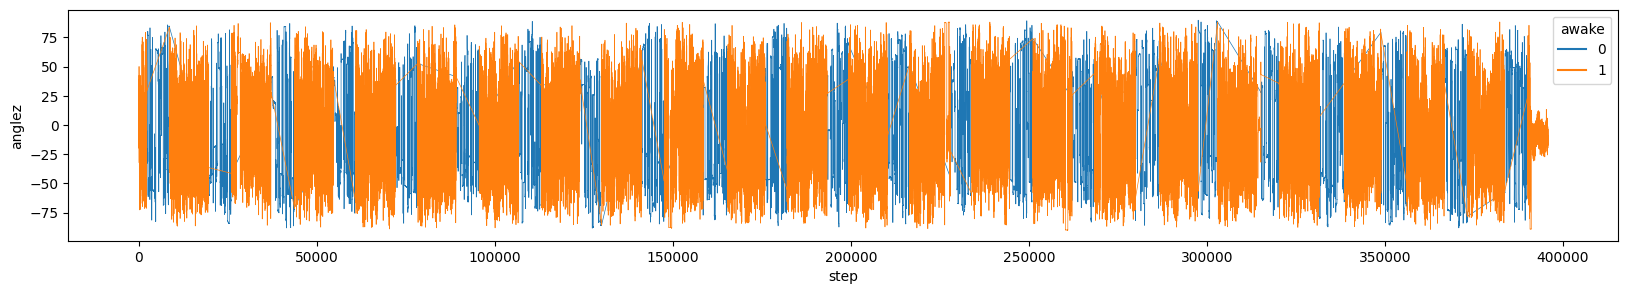

###  enmo for series d5e47b94477e

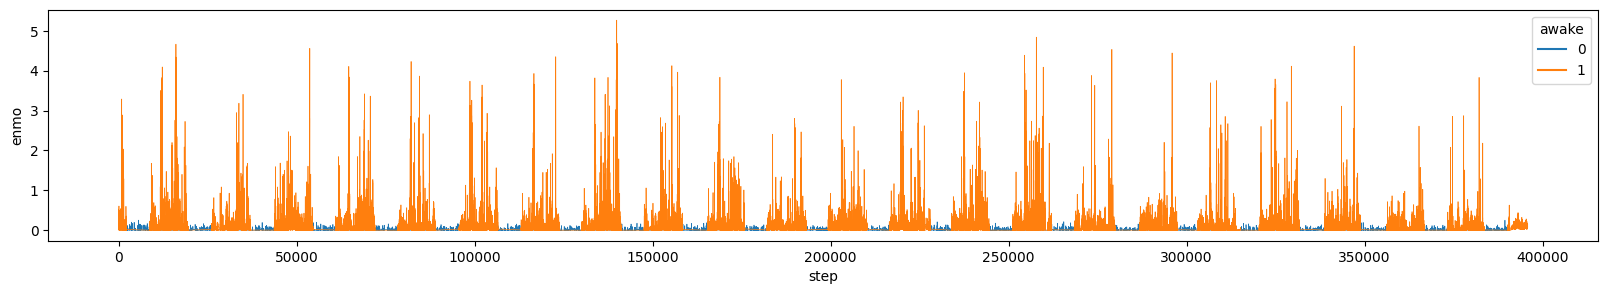

In [10]:
smaller_train_data = []

for series_id in no_NaN_series:
    train = get_train_series(series_id)
    smaller_train_data.append(train)
    
    # vizualize these series
    display(Markdown('###  anglez for series ' + series_id))
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.lineplot(data=train, x="step", y="anglez",hue="awake", linewidth = 0.5)
    plt.show();
    display(Markdown('###  enmo for series ' + series_id))
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.lineplot(data=train, x="step", y="enmo",hue="awake", linewidth = 0.5)
    plt.show();
    del train
    gc.collect();
    

In [11]:
Zzzs_train = pd.concat(smaller_train_data).reset_index(drop=True)
Zzzs_train["series_id"].nunique()

35

In [12]:
Zzzs_train

series_id    step                 timestamp     anglez    enmo  \
0         08db4255286f       0  2018-11-05T10:00:00-0400 -30.845301  0.0447   
1         08db4255286f       1  2018-11-05T10:00:05-0400 -34.181801  0.0443   
2         08db4255286f       2  2018-11-05T10:00:10-0400 -33.877102  0.0483   
3         08db4255286f       3  2018-11-05T10:00:15-0400 -34.282101  0.0680   
4         08db4255286f       4  2018-11-05T10:00:20-0400 -34.385799  0.0768   
...                ...     ...                       ...        ...     ...   
13165555  d5e47b94477e  395815  2017-12-02T15:44:35-0500 -10.064100  0.1552   
13165556  d5e47b94477e  395816  2017-12-02T15:44:40-0500 -10.006700  0.1139   
13165557  d5e47b94477e  395817  2017-12-02T15:44:45-0500  -3.328600  0.1245   
13165558  d5e47b94477e  395818  2017-12-02T15:44:50-0500  -5.903100  0.1363   
13165559  d5e47b94477e  395819  2017-12-02T15:44:55-0500 -11.691100  0.0995   

          awake  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
13165555      1  
13165556      1  
13165557      1  
13165558      1  
13165559      1  

[13165560 rows x 6 columns]

Write out the new lightweight dataset with these 35 selected series

In [13]:
Zzzs_train.to_parquet('Zzzs_train.parquet')

# `Zzzs_train_multi.parquet`
## Now also add on the 8 datasets that have no event data whatsoever (`class=2`)

In [14]:
train_series_names = pd.read_parquet("/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet", columns=['series_id'])
series_id_list = train_series_names['series_id'].unique().tolist()

train_events = train_events.dropna()
events_series_id_list = train_events['series_id'].unique().tolist()

base_series = list(set(series_id_list) - set(events_series_id_list))

# list out the series:
base_series

['2fc653ca75c7',
 'a3e59c2ce3f6',
 'c5d08fc3e040',
 '390b487231ce',
 'c7b1283bb7eb',
 'e11b9d69f856',
 '89c7daa72eee',
 '0f9e60a8e56d']

add the target `awake=2`

In [15]:
def get_train_series_base(series):
    train = pd.read_parquet("/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet", filters=[('series_id','=',series)])
    train["awake"] = 2
    # just to make sure
    train["awake"] = train["awake"].astype("int")
    return(train)

###  anglez for series 2fc653ca75c7

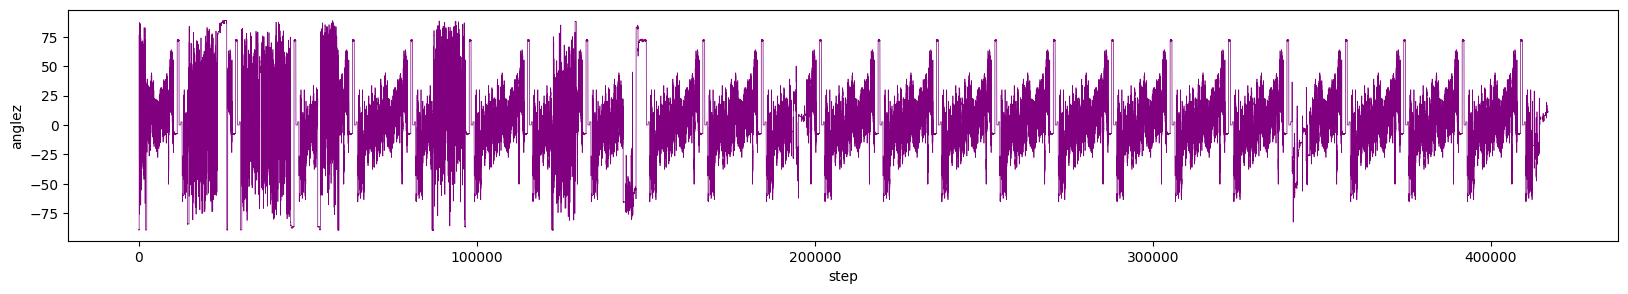

###  enmo for series 2fc653ca75c7

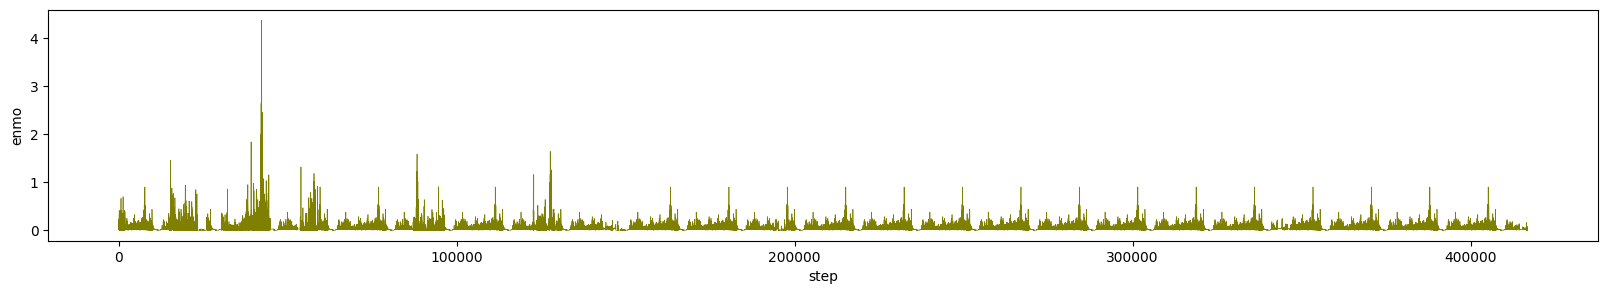

###  anglez for series a3e59c2ce3f6

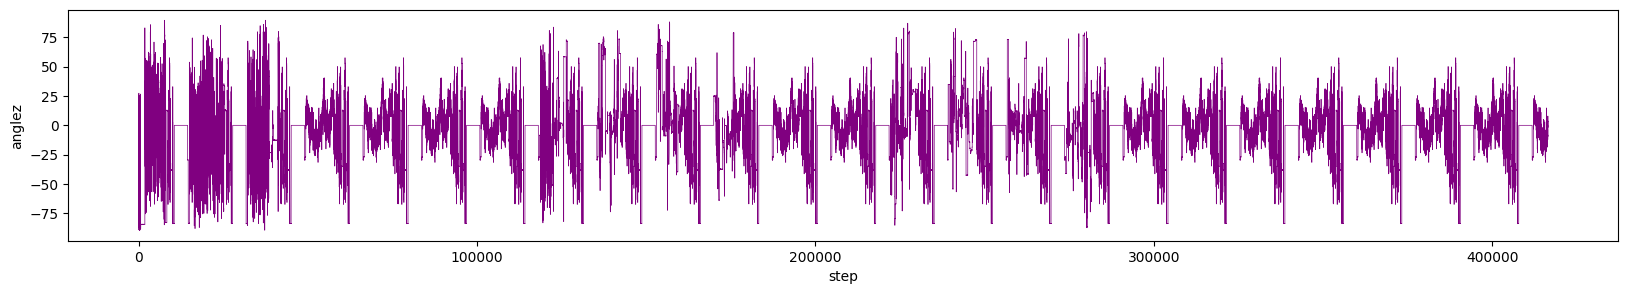

###  enmo for series a3e59c2ce3f6

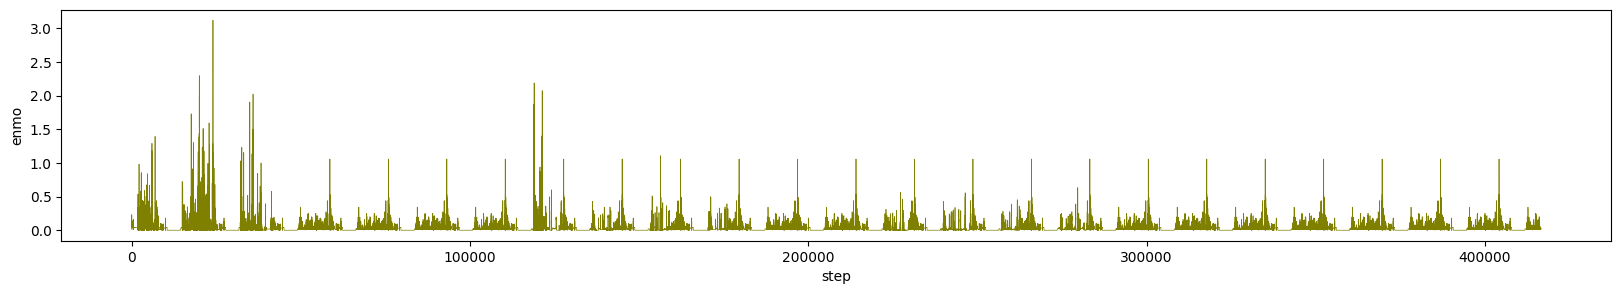

###  anglez for series c5d08fc3e040

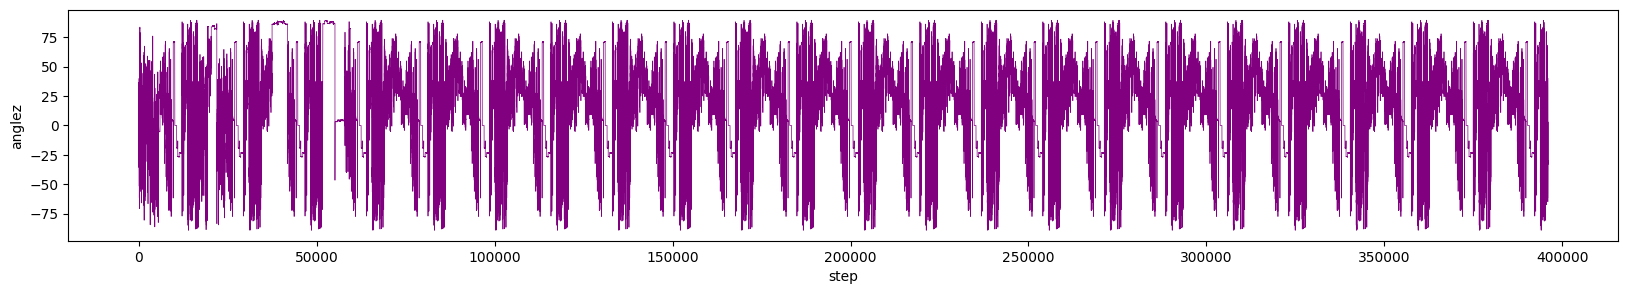

###  enmo for series c5d08fc3e040

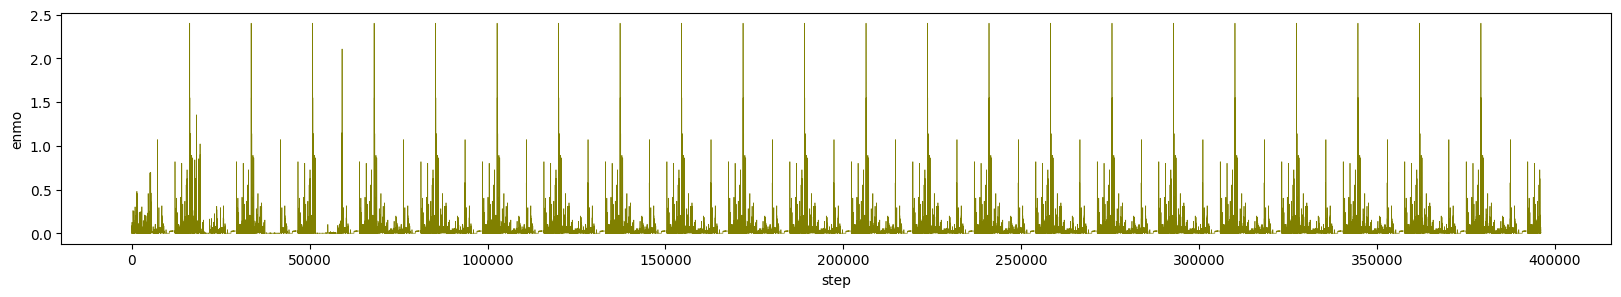

###  anglez for series 390b487231ce

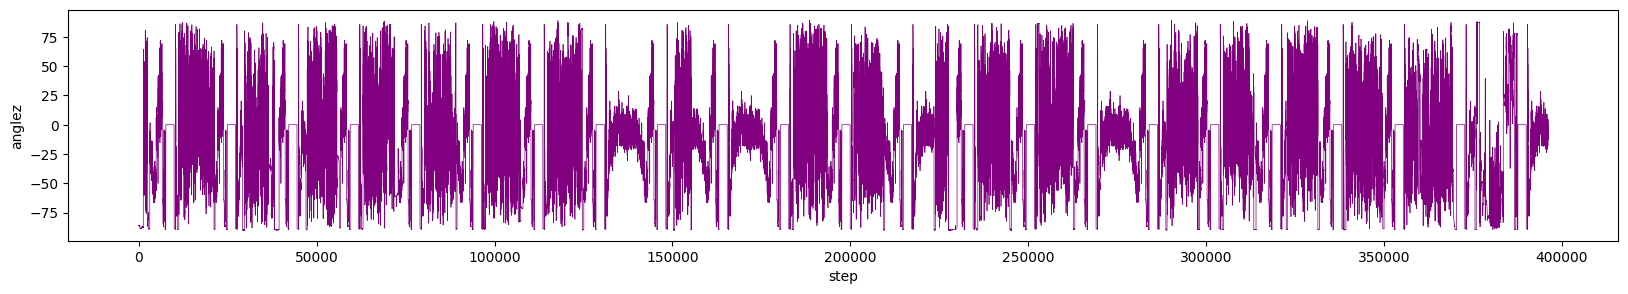

###  enmo for series 390b487231ce

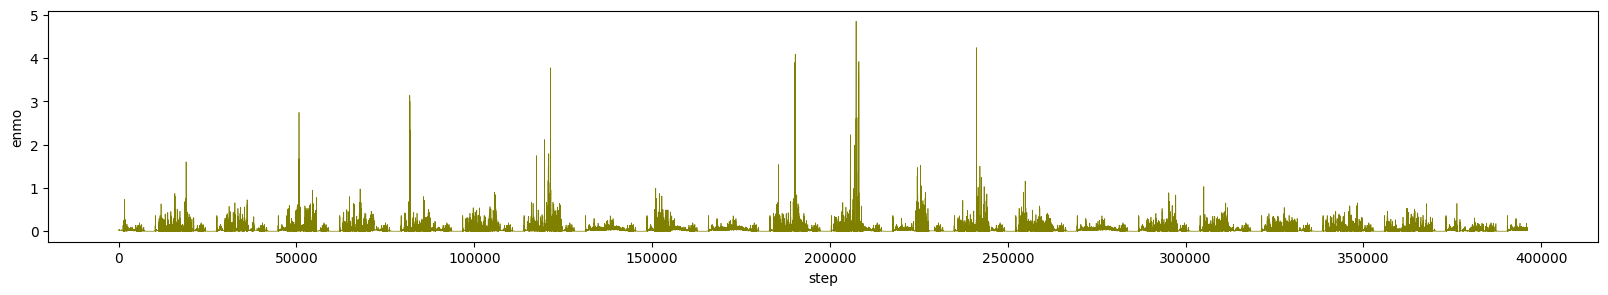

###  anglez for series c7b1283bb7eb

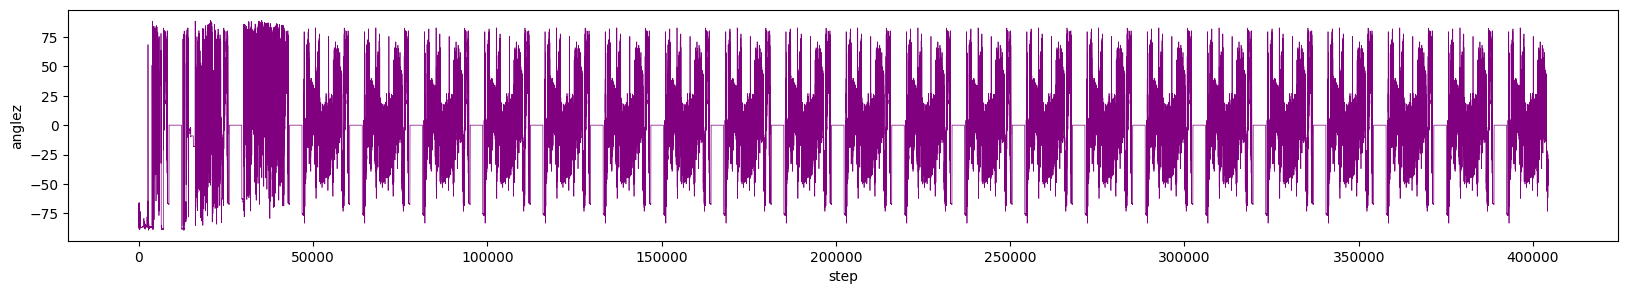

###  enmo for series c7b1283bb7eb

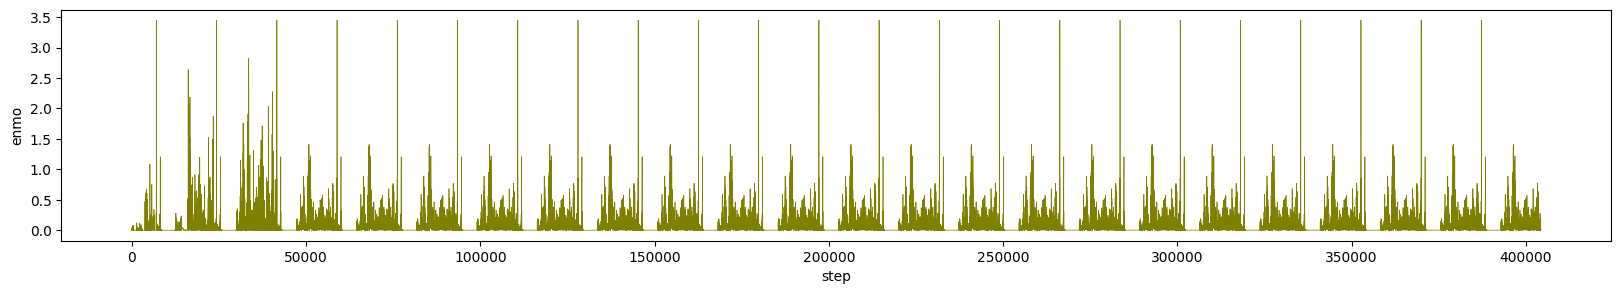

###  anglez for series e11b9d69f856

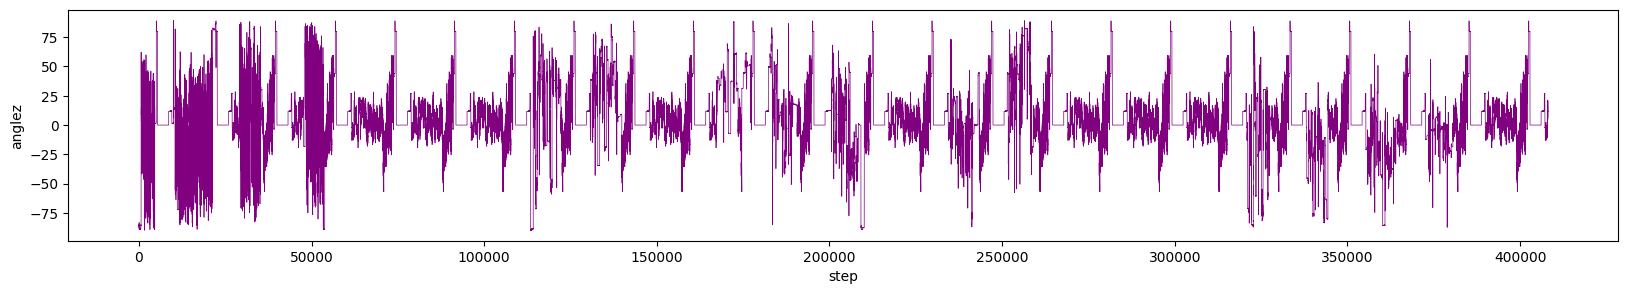

###  enmo for series e11b9d69f856

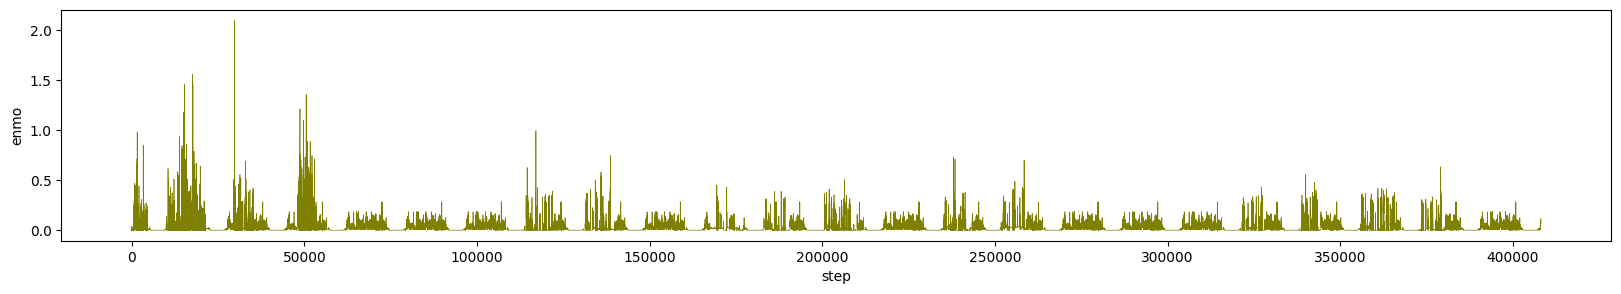

###  anglez for series 89c7daa72eee

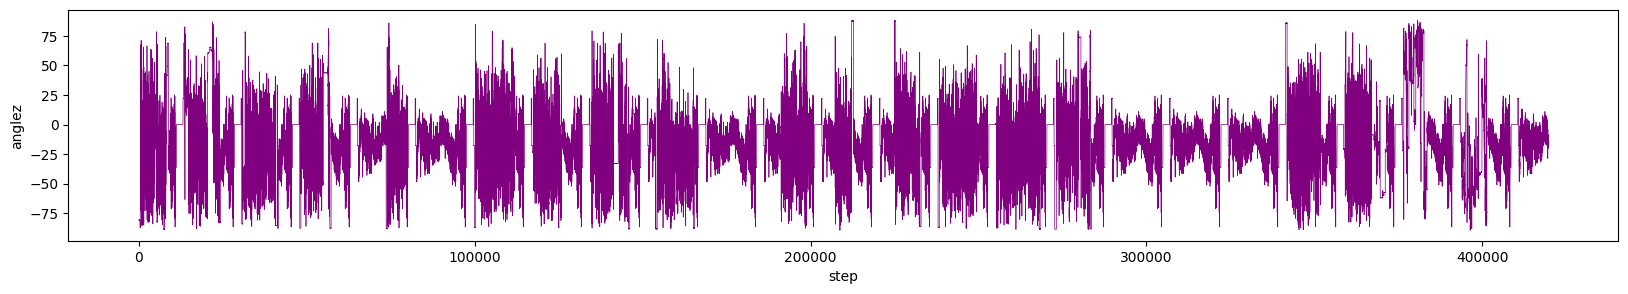

###  enmo for series 89c7daa72eee

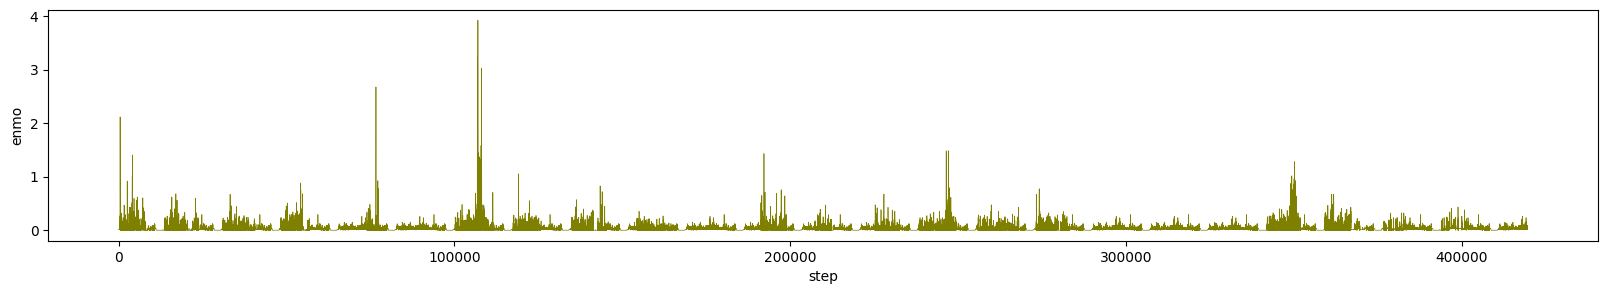

###  anglez for series 0f9e60a8e56d

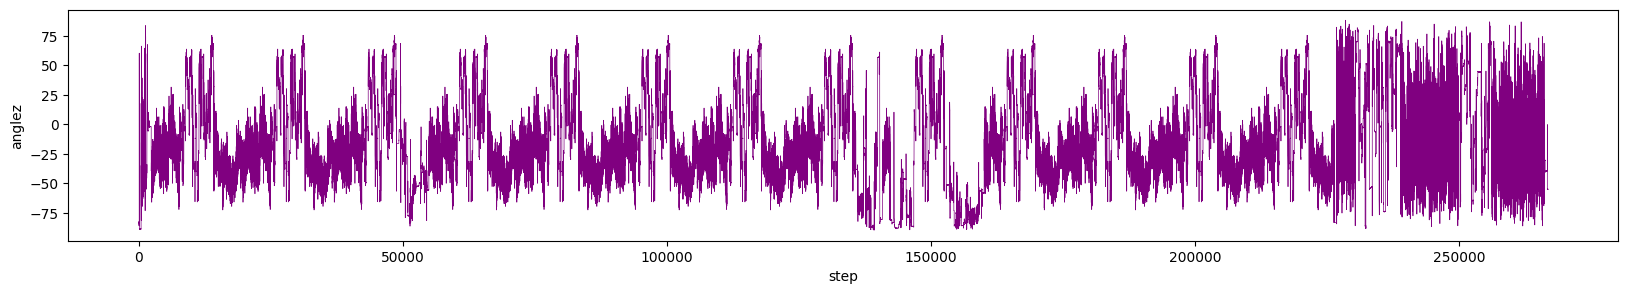

###  enmo for series 0f9e60a8e56d

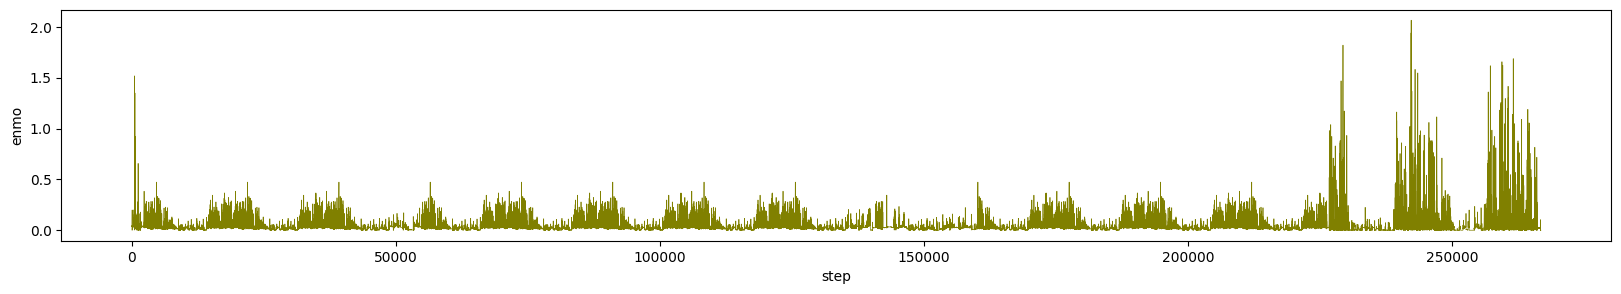

In [16]:
base_train_data = []

for series_id in base_series:
    train = get_train_series_base(series_id)
    base_train_data.append(train)
    
    # vizualize these series
    display(Markdown('###  anglez for series ' + series_id))
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.lineplot(data=train, x="step", y="anglez", color="purple", linewidth = 0.5)
    plt.show();
    display(Markdown('###  enmo for series ' + series_id))
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.lineplot(data=train, x="step", y="enmo", color="olive", linewidth = 0.5)
    plt.show();
    del train
    gc.collect();

In [17]:
Zzzs_base = pd.concat(base_train_data).reset_index(drop=True)
# combine the 35 series from before with the 8 series that have no event data
Zzzs_train_multi = pd.concat([Zzzs_train,Zzzs_base]).reset_index(drop=True)
# check number of series
Zzzs_train_multi["series_id"].nunique()

43

In [18]:
Zzzs_train_multi.to_parquet('Zzzs_train_multi.parquet')

# The datasets:
The two datasets have been saved to the Kaggle dataset: ["Zzzs: Lightweight training dataset + target"](https://www.kaggle.com/datasets/carlmcbrideellis/zzzs-lightweight-training-dataset-target)

* `Zzzs_train.parquet` 180M
* `Zzzs_train_multi.parquet` 220M

I hope they are useful to get started with!